# CS109A : Predicting Seizures and Epilepsy

**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Date: ** Wednesday, December 14th, 2016.<br>
** By **<br>
Gerard Nignon<br>
Mohammed Khamis Amro<br>
Steve Bowley<br> 
Christopher Martinez Servin 

In [142]:
import numpy                    as np
import pandas                   as pd
import scipy                    as sp
import scipy.stats              as stats
import seaborn                  as sns
import statsmodels.api          as sm
import random
import warnings
import matplotlib
import matplotlib.pyplot        as plt
%matplotlib inline
matplotlib.style.use('ggplot')

from sklearn                       import linear_model
from sklearn                       import discriminant_analysis
from sklearn                       import preprocessing
from sklearn.decomposition         import PCA
from sklearn                       import cross_validation
from sklearn.linear_model          import LogisticRegression
from sklearn                       import metrics
from sklearn.metrics               import confusion_matrix
from sklearn.metrics               import roc_curve
from sklearn.metrics               import classification_report
from sklearn.metrics               import accuracy_score
from sklearn.grid_search           import GridSearchCV
from sklearn.cross_validation      import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble              import ExtraTreesClassifier
from sklearn.datasets              import make_classification
from sklearn.decomposition         import PCA
from sklearn.feature_extraction    import DictVectorizer

from scipy.stats                 import mode
from collections                import Counter
from matplotlib                 import rcParams
#from imblearn.over_sampling     import ADASYN
#from imblearn.combine           import SMOTEENN
#from imblearn.over_sampling     import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = (20, 10)
rcParams['axes.facecolor'] = "w"
rcParams['grid.color'] = "gray"
rcParams['grid.linewidth'] = 0.5
sns.set(style="whitegrid", color_codes=True)
#print(__doc__)
sns.set()

# Stage 1: Ask A Question

*** Our project started off with a simple question: given that a person has a seizure, can we predict if that same person will have epilepsy? ***

This notebook will outline the data science process our team followed to try answering the above question. We will present our initial findings about epilepsy and seizure, we will describe the process of obtaining, exploring and cleaning the data, and we will present our possible prediction solution with its advantages and disadvantages.
Besides answering the above question, our model will address the main factors that cause a seizure and the key factors that evolve seizure into epilepsy. 

***1.1 PROJECT OVERVIEW***

65 Million people around the world live with Epilepsy, a chronic brain disorder characterized by recurrent, unprovoked seizures or convulsions. It is known as a spectrum condition due to the wide range of seizure types, and can affect people of all ages with varying degrees of severity. Root causes may be related to brain injury or hereditary factors, but in as many as 6 in 10 cases, the underlying cause is unknown (source: Epilepsy Foundation - http://www.epilepsy.com).

** What are the factors that may indicate epilepsy rather than other causes of seizures? **

Accurate and early diagnosis of an epileptic condition is essential in providing appropriate and timely care to those affected.  Traditional diagnostic tests include neurological examinations, blood tests and brain wave monitoring.

** How well can epilepsy be predicted using non-traditional  methods? **

While these tests are easily administered and interpreted, there are many other personal and social factors that may be related to the causes of seizures which are less apparent. A greater understanding of these factors, and the relationship they have with sufferers of the disease, would enable better predictions to be made regarding the likelihood that someone has the disease, given they have experienced a seizure.

This project sets out to investigate these relationships by modelling the probability that, ** given someone has experienced a seizure or convulsive event, they continue to suffer from recurring seizures and may be diagnosed as having epilepsy.**

** Given that someone has experienced a convulsion or seizure, are they likely to have epilepsy? **

By analysing ** social, demographic and medical** data in epileptic patients compared to patients who have experienced a seizure type event, but have subsequently **not** been diagnosed with an epileptic condition, this project aims to develop a predictive model of epilepsy in patients after first seizure.

The results are intended to support early diagnosis of epilepsy, provide insight into common characteristics of epileptic patients, and help identify potential underlying causes of the condition.

# <span style="color:#08088A"> Stage 2: Get the Data  </span>



### <span style="color:#F78181"> 2.1 NCDS  </span>



The **National Child Development Study ** (NCDS) is a continuing study which follows the lives of 18,558 people born in England, Scotland and Wales during the first week of March, 1958. The results from this study helped reduce infant mortality and were instrumental in improving maternity services in the UK.

The study collects information on physical and educational development, economic circumstances, employment, family life, health behavior, well-being, social participation and attitudes. 

### <span style="color:#F78181"> 2.2 The Surveys - NCDS Data Collection </span>

Since the birth survey in 1958, there have been nine further ‘sweeps’ of all cohort members at ages 7, 11, 16, 23, 33, 42, 46, 50 and 55. The patient data was collected by using self-reported medical questionnaires, as well as professional medical  questionnaires. 


### <span style="color:#F78181"> 2.3 NCDS Datasets </span>



- We used the Data collected from the cohort group at birth, 7, 11 and 16 years (Childhood data PMS & NCDS 1-3) which is contained in a Stata data file (.dta) called “**ncds0123.dta**”. 


- The primary key field is “**ncdsid**” and contains 18558 unique records (cases). 


- The UK Data Archive Data Dictionary (**ncds0123_ukda_data_dictionary.rtf**) provides an index to the variables and their value labels which cover  information on parents social class, housing, occupation, region, relationships, health, hobbies, education, observations about their children among other related topics.


- Information on childhood illness within the cohort group is contained in the “**ncds_archived_data_cfs_and_ibs_outcomes.dta**”. This dataset examines childhood illnesses that place them at risk of Chronic Fatigue Syndrome (CFS) / Mylagic Encephalitis (ME) and Irritable Bowel Syndrome (IBS). It contains information on prevalence of epilepsy at 7, 11 and 16 years.


- These two datasets can be joined using the primary key “ncdsid”.


**Note** : The data for all NCDS sweeps is available from the UK Data Service



### <span style="color:#F78181"> 2.4 Load the NCDS datasets </span>

In [225]:
#---- Read ncds_archived_data_cfs_and_ibs_outcomes data set  -------------------------#
data_health_condition = pd.read_stata('ncds_archived_data_cfs_and_ibs_outcomes.dta')

#---- Read ncds0123.dta data set  ----------------------------------------------------#
data_main = pd.read_stata('ncds0123.dta',convert_categoricals=False)

#---- Display the Shape of ncds0123 data set  ----------------------------------------#
print  'Shape of ncds_archived dataset : ' , data_health_condition.shape

#---- Display the Shape of ncds0123 data set  ----------------------------------------#
print  'Shape of ncds0123 dataset      : ' , data_main.shape

Shape of ncds_archived dataset :  (18558, 198)
Shape of ncds0123 dataset      :  (18558, 1765)


In [226]:
#---- Display the header of data_health_condition data frame  ------------------------#
data_health_condition.head()

,ncdsid,me,ibsoriginal,mal01backache,mal02tired,mal04headaches,mal06sleepingdifficulties,mal23rheumatism,ghqconcentration,cflikesymptoms,...,infecillness16y,childactive7,sport11,outdoorsport16,indoorsport16,sport23,exercisejob33,sport33,physicaljob42,sport42
0,N10001N,no,no,no,yes,yes,no,no,no,1.0,...,0.0,normally active,most days,often,sometimes,no sport last 4 wks,no exercise,2-3 days a week,moderate amount,4-5 days a week
1,N10002P,no,no,no,no,no,no,no,no,0.0,...,0.0,normally active,hardly ever,hardly ever/no chance,hardly ever/no chance,no sport last 4 wks,no exercise,once a week,moderate amount,every day
2,N10003Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,normally active,hardly ever,hardly ever/no chance,hardly ever/no chance,NaN,NaN,NaN,NaN,NaN
3,N10004R,no,no,no,no,no,no,no,no,0.0,...,0.0,normally active,most days,often,sometimes,no sport last 4 wks,NaN,once a week,moderate amount,every day
4,N10005S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,over active,sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
#---- Display the header of ncds0123 dataset  -------------------------------------#
data_main.head()

,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,n1849,dvht07,dvht11,dvht16,dvrwt07,dvrwt11,dvrwt16,dvwt07,dvwt11,dvwt16
0,N10001N,2.0,9.0,9.0,9.0,9.0,23.0,4.0,2.0,12.0,...,-1.0,1.219000,1.473,1.599999,110.347992,98.192993,105.056000,25.854996,37.648987,56.019989
1,N10002P,1.0,9.0,8.0,8.0,8.0,34.0,4.0,5.0,1.0,...,-1.0,1.346000,-1.000,-1.000000,90.865997,-1.000000,-1.000000,26.308990,-1.000000,-1.000000
2,N10003Q,1.0,4.0,4.0,4.0,4.0,34.0,4.0,10.0,1.0,...,-1.0,1.320999,1.499,1.879999,87.959991,96.404999,89.382996,24.493988,38.101990,66.679993
3,N10004R,2.0,1.0,1.0,1.0,1.0,26.0,4.0,11.0,1.0,...,-1.0,1.294999,1.511,1.629999,105.161987,111.588989,132.054993,28.122986,45.813995,72.799988
4,N10005S,2.0,10.0,10.0,10.0,10.0,25.0,4.0,1.0,3.0,...,-1.0,1.346000,-1.000,-1.000000,129.382996,-1.000000,-1.000000,37.648987,-1.000000,-1.000000


**  joined both dataset using the primary key “ncdsid”. **

In [228]:
#---- joined both dataset using the primary key “ncdsid”--------------------------#
extended_df = pd.merge(data_main, data_health_condition, on='ncdsid', how='outer')
#---- Display the sahpe of extended df  ------------------------------------------#
print (extended_df.shape)
#---- Display the header of extended df ------------------------------------------#
extended_df.head()

(18558, 1962)


,ncdsid,n622,n0region,n1region,n2region,n3region,n553,n545,n520,n490,...,infecillness16y,childactive7,sport11,outdoorsport16,indoorsport16,sport23,exercisejob33,sport33,physicaljob42,sport42
0,N10001N,2.0,9.0,9.0,9.0,9.0,23.0,4.0,2.0,12.0,...,0.0,normally active,most days,often,sometimes,no sport last 4 wks,no exercise,2-3 days a week,moderate amount,4-5 days a week
1,N10002P,1.0,9.0,8.0,8.0,8.0,34.0,4.0,5.0,1.0,...,0.0,normally active,hardly ever,hardly ever/no chance,hardly ever/no chance,no sport last 4 wks,no exercise,once a week,moderate amount,every day
2,N10003Q,1.0,4.0,4.0,4.0,4.0,34.0,4.0,10.0,1.0,...,0.0,normally active,hardly ever,hardly ever/no chance,hardly ever/no chance,NaN,NaN,NaN,NaN,NaN
3,N10004R,2.0,1.0,1.0,1.0,1.0,26.0,4.0,11.0,1.0,...,0.0,normally active,most days,often,sometimes,no sport last 4 wks,NaN,once a week,moderate amount,every day
4,N10005S,2.0,10.0,10.0,10.0,10.0,25.0,4.0,1.0,3.0,...,0.0,over active,sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <span style="color:#08088A"> Stage 3: Build Model Dataset  </span>


As a First step, We need to build our dataset as following:

- Identify **y_seizure** response variable which indicate if the child face a seizure attack in the past with possible two values:<br>

    - y_seizure   =   0      if Child didn't face any seizure attack          
    - y_seizure   =   1      if Child had faced at least one epilepsy attack 
     
- Identify **y_epileptic** variable which indicate if the Seizure evolved to epileptic case or not with three possible values :<br>

    - y_epilepsy  =  0       if the child didn't face any seizure or epilepsy attack
    - y_epilepsy  =  1       if the child had face seizure attack but didn't evolve to epilepsy          
    - y_epilepsy  =  2       if the child had face seizure attack and evolved to epilepsy 
   
   
- Identify a set of features to be used in our model after removing all medical test variables related to epilepsy in additional to parents feedback variables indicating epilepsy case so our model can predict the seizure/epilepsy case without making medical check or asking parents for their feedback.



### <span style="color:#F78181">  3.1 Calculate our First Response Variable  y_seizure  </span>


- In order to calculate y_seizure value we will calculate the following three variables:
    - seizure7
    - seizure11
    - seizure16.
    
- Seizure 7 = 1 if the child had a seizure attack from brith upto age of 7 , we calculate this value from any variable either a medical check or parents feedback indicating a seizure attack or eplieptic condition for example ** 0 Illness noted in PMS-MC1:3 ** variable with value = 3.0 indicate a Convulsions(Seizure) noted in PMS .
    
- Seizure 11 follow the same concept for set of variables for age 11 data collection.
   
- Seizure 16 follow the same concept for set of variables for age 16 data collection.
    
- Our Response Variable (**y_seizure**)  = 1 if seizure7 =1 or seizure11 =1 or seizure16 =1
 

In [230]:
#---- Calculate seizure7 variable ---------------------------------------------------------------------------------------------#
epilepsy_response['seizure7']=((
                         extended_df.n1831 == 3)    # 0 Illness noted in PMS-MC1:3              Value = 3.0   Label = Convulsions etc.
                      | (extended_df.n1832 == 3)    # 0 Illness noted in PMS-MC2:3              Value = 3.0   Label = Convulsions etc.
                      | (extended_df.n1833 == 3)    # 0 Illness noted in PMS-MC3:3              Value = 3.0   Label = Convulsions etc.
                      | (extended_df.n274  == 2)    # 1P Fit or convulsion in 1st year of life  Value = 2.0    Label = Yes
                      | (extended_df.n275  == 2)    # 1P Fit or convulsion after 1st year       Value = 2.0	   Label = Yes
                      | (extended_df.n390 == 10)    # 1M Reason for Special Education MC1:3     Value = 10.0   Label = Epileptic
                      | (extended_df.n391 == 10)    # 1M Reason for Special Education MC2:3     Value = 10.0   Label = Epileptic
                      | (extended_df.n392 == 10)    # 1M Reason for Special Education MC3:3     Value = 10.0   Label = Epileptic
                      | ((extended_df.n1314 >=0) & (extended_df.n1314 <= 7))    # 2P Age at most recent epilepsy attack
                      | ((extended_df.n1317 >=0) & (extended_df.n1317 <= 7))     # 2P Age at 1st epilepsy attack
                      | (extended_df.n1502 ==2)      # 2M Has child ever had convulsions
                      | (extended_df.n1502 ==4)      # 2M Has child ever had convulsions
                      | ((extended_df.n2615 >= 1) & (extended_df.n2615 <= 4))   # 3P When convulsions,fits 1st occured
                      | ((extended_df.n2616 >= 1) & (extended_df.n2616 <= 4))   #3P Convulsions-most recent occurrence                      
                      | (extended_df.n1842 >= 1)   # 12D Epilepsy identification                     

                     )*1

print 'Seizure at age of 7 \n--------------------- \n' ,epilepsy_response.seizure7.value_counts()


Seizure at age of 7 
--------------------- 
0    17355
1     1203
Name: seizure7, dtype: int64


In [231]:
#---- Calculate seizure11 variable -------------------------------------------------------------------------------------------#
epilepsy_response['seizure11']=(  (
                          extended_df.n1477 == 7)    # 2M Reason for special education - MC1:3    Value = 7.0	Label = Epileptic
                       | (extended_df.n1478 == 7)    # 2M Reason for special education - MC2:3    Value = 7.0	Label = Epileptic
                       | (extended_df.n1479 == 7)    # 2M Reason for special education - MC3:3    Value = 7.0	Label = Epileptic
                       | (extended_df.n1307 == 1)     # 2P Has child had epilepsy attacks-MC 1:3
                       | (extended_df.n1307 == 2)     # 2P Has child had epilepsy attacks-MC 1:3
                       | (extended_df.n1307 == 3)     # 2P Has child had epilepsy attacks-MC 1:3
                       | (extended_df.n1308 == 1)     # 2P Has child had epilepsy attacks-MC 2:3
                       | (extended_df.n1308 == 2)     # 2P Has child had epilepsy attacks-MC 2:3
                       | (extended_df.n1308 == 3)     # 2P Has child had epilepsy attacks-MC 2:3
                       | (extended_df.n1309 == 1)     # 2P Has child had epilepsy attacks-MC 3:3
                       | (extended_df.n1309 == 2)     # 2P Has child had epilepsy attacks-MC 3:3
                       | (extended_df.n1309 == 3)     # 2P Has child had epilepsy attacks-MC 3:3
                       | ((extended_df.n1314 >= 8) & (extended_df.n1314 <= 11))   # 2P Age at most recent epilepsy attack
                       | ((extended_df.n1317 >= 8) & (extended_df.n1317 <= 11))   # 2P Age at 1st epilepsy attack
                       | (extended_df.n1321 == 8)    # 2P Reason for absence from school-MC 1:5   Value = 8.0	Label = Convulsions
                       | (extended_df.n1322 == 8)    # 2P Reason for absence from school-MC 2:5   Value = 8.0	Label = Convulsions
                       | (extended_df.n1323 == 8)    # 2P Reason for absence from school-MC 3:5   Value = 8.0	Label = Convulsions
                       | (extended_df.n1324 == 8)    # 2P Reason for absence from school-MC 4:5   Value = 8.0	Label = Convulsions
                       | (extended_df.n1325 == 8)    # 2P Reason for absence from school-MC 5:5   Value = 8.0	Label = Convulsions
                       | (extended_df.n1337 == 1)    # 2P Reason for prescription  M:C 1-2        Value = 1.0	Label = Convulsions etc.
                       | (extended_df.n1338 == 8)    # 2P Reason for prescription  M:C 2-2        Value = 1.0	Label = Convulsions etc.
                       | (extended_df.n1394 == 2)    # 2P Ever seen specialist-convulsions,fits   Value = 2,3,5
                       | (extended_df.n1394 == 3)    # 2P Ever seen specialist-convulsions,fits   Value = 2,3,5
                       | (extended_df.n1394 == 5)    # 2P Ever seen specialist-convulsions,fits   Value = 2,3,5
                       | (extended_df.n1502 == 3)     # 2M Has child ever had convulsions
                       | (extended_df.n1502 == 4)     # 2M Has child ever had convulsions
                       | (extended_df.n2615 == 5)    # 3P When convulsions,fits 1st occured  Value = 5.0	Label = Between 7&11 yrs
                       | (extended_df.n2616 == 5)    # 3P Convulsions-most recent occurrence Value = 5.0	Label = Between 7&11 yrs                       
                     )*1
print 'Seizure at age of 11 \n--------------------- \n' , epilepsy_response.seizure11.value_counts()


Seizure at age of 11 
--------------------- 
0    17925
1      633
Name: seizure11, dtype: int64


In [232]:
#---- Calculate seizure16 variable --------------------------------------------------------------------------------#
epilepsy_response['seizure16']=(  (extended_df.n1893 == 8)    # 3M Category of child's handicap MC1:3   Value = 8.0	Label = Epileptic
                       | (extended_df.n1894 == 8)    # 3M Category of child's handicap MC2:3   Value = 8.0	Label = Epileptic
                       | (extended_df.n1895 == 8)    # 3M Category of child's handicap MC3:3   Value = 8.0	Label = Epileptic
                       | (extended_df.n2663 == 7)    # 3P Nature of child-s disability-MC 1:5   Value = 7.0	Label = Epilepsy
                       | (extended_df.n2664 == 7)    # 3P Nature of child-s disability-MC 2:5   Value = 7.0	Label = Epilepsy
                       | (extended_df.n2665 == 7)    # 3P Nature of child-s disability-MC 3:5   Value = 7.0	Label = Epilepsy
                       | (extended_df.n2666 == 7)    # 3P Nature of child-s disability-MC 4:5   Value = 7.0	Label = Epilepsy
                       | (extended_df.n2667 == 7)    # 3P Nature of child-s disability-MC 5:5   Value = 7.0	Label = Epilepsy
                       | (extended_df.n1904 == 17)     # 3M Reason for hosp admiss last 12 mnths Value = 17.0	Label = Epilepsy
                       | (extended_df.n1910 == 17)     # 3M Reason hosp outpatient last yr      Value = 17.0	Label = Epilepsy
                       | (extended_df.n2032 == 3)     # 3M Epilepsy  Value = 3.0	Label = Cond,no handcp
                       | (extended_df.n2032 == 4)     # 3M Epilepsy  Value = 4.0	Label = Slight handicap
                       | (extended_df.n2032 == 5)     # 3M Epilepsy  Value = 5.0	Label = Moderate handicp
                       | (extended_df.n2032 == 6)     # 3M Epilepsy  Value = 6.0	Label = Severe handicap
                       | (extended_df.n2032 == 7)     # 3M Epilepsy  Value = 7.0	Label = Cond,DK degree
                       | (extended_df.n2554 == 3)     # 3P Reason for absence from school-MC 1:6   Value = 11.0	Label = Convulsions,fits
                       | (extended_df.n2555 == 3)     # 3P Reason for absence from school-MC 2:6   Value = 11.0	Label = Convulsions,fits
                       | (extended_df.n2556 == 3)     # 3P Reason for absence from school-MC 3:6   Value = 11.0	Label = Convulsions,fits
                       | (extended_df.n2557 == 3)     # 3P Reason for absence from school-MC 4:6   Value = 11.0	Label = Convulsions,fits
                       | (extended_df.n2558 == 3)     # 3P Reason for absence from school-MC 5:6   Value = 11.0	Label = Convulsions,fits
                       | (extended_df.n2559 == 3)     # 3P Reason for absence from school-MC 6:6   Value = 11.0	Label = Convulsions,fits
                       | (extended_df.n2598 == 7)    # 3P Hospital admissions,general-MC 1:4  Value = 7.0	Label = Convulsions
                       | (extended_df.n2599 == 7)    # 3P Hospital admissions,general-MC 1:4  Value = 7.0	Label = Convulsions
                       | (extended_df.n2600 == 7)    # 3P Hospital admissions,general-MC 1:4  Value = 7.0	Label = Convulsions
                       | (extended_df.n2601 == 7)    # 3P Hospital admissions,general-MC 1:4  Value = 7.0	Label = Convulsions
                       | (extended_df.n2603 == 10)   # 3P Hosp outpatient,diagnosed cond-MC 1:6   Value = 10.0	Label = Convulsions
                       | (extended_df.n2604 == 10)   # 3P Hosp outpatient,diagnosed cond-MC 2:6   Value = 10.0	Label = Convulsions
                       | (extended_df.n2605 == 10)   # 3P Hosp outpatient,diagnosed cond-MC 3:6   Value = 10.0	Label = Convulsions
                       | (extended_df.n2606 == 10)   # 3P Hosp outpatient,diagnosed cond-MC 4:6   Value = 10.0	Label = Convulsions
                       | (extended_df.n2607 == 10)   # 3P Hosp outpatient,diagnosed cond-MC 5:6   Value = 10.0	Label = Convulsions
                       | (extended_df.n2608 == 10)   # 3P Hosp outpatient,diagnosed cond-MC 6:6   Value = 10.0	Label = Convulsions
                       | (extended_df.n2614 == 1)    # 3P Convulsions,fits-unconsciousness   Value = 1.0	Label = Yes
                       | (extended_df.n2615 == 6)   # 3P When convulsions,fits 1st occured Value = 6.0	Label = Since 11th year
                       | (extended_df.n2616 == 6)    # 3P Convulsions-most recent occurrence  Value = 6.0	Label = 11+, nt past yr
                       | (extended_df.n2616 == 7)    # 3P Convulsions-most recent occurrence  Value = 7.0	Label = In past year
                       | (extended_df.n2616 == 8)    # 3P Convulsions-most recent occurrence  Value = 8.0	Label = DK age                
                     )*1

print 'Seizure at age of 16 \n--------------------- \n' , epilepsy_response.seizure16.value_counts()


Seizure at age of 16 
--------------------- 
0    17922
1      636
Name: seizure16, dtype: int64


In [233]:
#---- Caluclate seizure value  = 1 if seizure7 =1 or seizure11 =1 or seizure16 =1 -----------#
epilepsy_response['seizure'] = (
                                (epilepsy_response.seizure7  == 1)
                              | (epilepsy_response.seizure11 == 1)
                              | (epilepsy_response.seizure16 == 1)    
                               )*1

print '\nSeizure Response  \n------------------ \n' , epilepsy_response.seizure.value_counts()



Seizure Response  
------------------ 
0    17098
1     1460
Name: seizure, dtype: int64


** Calculate our first Response Variable y_seizure **

In [242]:
#--------------------------------------------------------------------------------------#
#-----  y_seizure   =   0      #---- Child didn't face any seizure attack          ----#
#-----  y_seizure   =   1      #---- Child had faced at least one epilepsy attack  ----#
 y_seizure = epilepsy_response['seizure']
#--------------------------------------------------------------------------------------#    

### <span style="color:#F78181">  3.2 Calculate our Second Response Variable  y_epilepsy  </span>


- Epilepsy at age of 7,11, and 16 are clearly identified from ncds_archived_data_cfs_and_ibs_outcomes dataset using variables epilepsy7,epilepsy11,epilepsy16 as following :


- Epilepsy7
    - Pos. = 47 Variable = Epilepsy7 Variable label = 1M Epileptic condition
         This variable is numeric, the SPSS measurement level is scale.
            SPSS user missing values = -1 and -2
            Value label information for Epilepsy7
            Value = 0 Label = No
            Value = 1 Label = Yes
 
- Epilepsy11 
     - Pos. = 101	Variable = Epilepsy11	Variable label = 2 Epilepy Derived variable
         This variable is  numeric, the SPSS measurement level is scale.
            SPSS user missing values = -1 and -2
            Value label information for Epilepsy11
            Value = 0	Label = No
            Value = 1	Label = Yes
- Epilepsy16
    - Pos. = 130	Variable = Epilepsy16	Variable label = 3 Epilepsy Derived variable
         This variable is  numeric, the SPSS measurement level is scale.
            SPSS user missing values = -1 and -2
            Value label information for Epilepsy16
            Value = 0	Label = No
            Value = 1	Label = Yes

- Our Epilepsy Response Variable will =1 if Epilepsy7 =1 or Epilepsy11 =1 or Epilepsy16 =1

In [229]:
#---- Create new datafram epilepsy_response to hold epilepsy/seizure related variables --------#
epilepsy_response=extended_df[['epilepsy7','epilepsy11','epilepsy16' ]]

#---- Display the epilepsy7,11,16 distribution ---------------------------------#
print 'Epilepsy at age of 7 \n--------------------- \n' ,epilepsy_response.epilepsy7.value_counts()

print '\nEpilepsy at age of 11  \n--------------------- \n' ,epilepsy_response.epilepsy11.value_counts()
print '\nEpilepsy at age of 16  \n--------------------- \n' ,epilepsy_response.epilepsy16.value_counts()


#---- Caluclate epilepsy value  = 1 if Epilepsy7 =1 or Epilepsy11 =1 or Epilepsy16 =1 -----------#
epilepsy_response['epilepsy'] = (
                                (epilepsy_response.epilepsy7  == 'yes')
                              | (epilepsy_response.epilepsy11 == 'yes')
                              | (epilepsy_response.epilepsy16 == 'yes')    
                               )*1

print '\nEpilepsy Response  \n------------------ \n' , epilepsy_response.epilepsy.value_counts()


Epilepsy at age of 7 
--------------------- 
no     13901
-1      4566
yes       91
Name: epilepsy7, dtype: int64

Epilepsy at age of 11  
--------------------- 
no     13371
-1      4888
yes      299
Name: epilepsy11, dtype: int64

Epilepsy at age of 16  
--------------------- 
no     18393
-1       119
yes       46
Name: epilepsy16, dtype: int64

Epilepsy Response  
------------------ 
0    18194
1      364
Name: epilepsy, dtype: int64


** Calculate our Second Response Variable y_epilepsy **

In [250]:
#-------------------------------------------------------------------------------------------------#
#---- y_epilepsy  =  0       #---- child didn't face any seizue or epilepsy attack            ----#
#---- y_epilepsy  =  1       #---- child had face seizue attack but didn't evolve to epilepsy ----#          ----#
#---- y_epilepsy  =  2       #---- child had face seizure attack and evolve to epilepsy       ----#

y_epilepsy = [0 if x==0 else 1 if (x==1 and y==1) else 2 if (x==1 and y==0) else 9 for\
           x, y in zip(epilepsy_response.seizure,epilepsy_response.epilepsy)]
y_epilepsy = np.array(y_epilepsy)

### <span style="color:#F78181"> 3.3 Dropping all features used to build our predictors </span>


- All above features used in y_seizure/y_epilepsy calculation are mainly represent the seizure/epilepsy identification either though medical identification or though parent feedback. 


- Our Model target is to predict Seizure/Epilepsy case without using Medical identification or Parents Feedback.


- So after we calculated our response variables (y_seizure , y_epilepsy) using these feature we will drop them all and build a model to predict Seizure/Epilepsy case without making special medical test or asking for parents feedback.


In [234]:
data_main.drop('n1831', axis=1 , inplace=True)
data_main.drop('n1832', axis=1 , inplace=True)
data_main.drop('n1833', axis=1 , inplace=True)
data_main.drop('n274', axis=1 , inplace=True)
data_main.drop('n275', axis=1 , inplace=True)
data_main.drop('n390', axis=1 , inplace=True)
data_main.drop('n391', axis=1 , inplace=True)
data_main.drop('n392', axis=1 , inplace=True)
data_main.drop('n1314', axis=1 , inplace=True)
data_main.drop('n1317', axis=1 , inplace=True)
data_main.drop('n1502', axis=1 , inplace=True)
data_main.drop('n2615', axis=1 , inplace=True)
data_main.drop('n2616', axis=1 , inplace=True)
data_main.drop('n1477', axis=1 , inplace=True)
data_main.drop('n1478', axis=1 , inplace=True)
data_main.drop('n1479', axis=1 , inplace=True)
data_main.drop('n1307', axis=1 , inplace=True)
data_main.drop('n1308', axis=1 , inplace=True)
data_main.drop('n1309', axis=1 , inplace=True)
data_main.drop('n1321', axis=1 , inplace=True)
data_main.drop('n1322', axis=1 , inplace=True)
data_main.drop('n1323', axis=1 , inplace=True)
data_main.drop('n1324', axis=1 , inplace=True)
data_main.drop('n1325', axis=1 , inplace=True)
data_main.drop('n1337', axis=1 , inplace=True)
data_main.drop('n1338', axis=1 , inplace=True)
data_main.drop('n1394', axis=1 , inplace=True)
data_main.drop('n1893', axis=1 , inplace=True)
data_main.drop('n1894', axis=1 , inplace=True)
data_main.drop('n1895', axis=1 , inplace=True)
data_main.drop('n2663', axis=1 , inplace=True)
data_main.drop('n2664', axis=1 , inplace=True)
data_main.drop('n2665', axis=1 , inplace=True)
data_main.drop('n2666', axis=1 , inplace=True)
data_main.drop('n2667', axis=1 , inplace=True)
data_main.drop('n1904', axis=1 , inplace=True)
data_main.drop('n1910', axis=1 , inplace=True)
data_main.drop('n2032', axis=1 , inplace=True)
data_main.drop('n2554', axis=1 , inplace=True)
data_main.drop('n2555', axis=1 , inplace=True)
data_main.drop('n2556', axis=1 , inplace=True)
data_main.drop('n2557', axis=1 , inplace=True)
data_main.drop('n2558', axis=1 , inplace=True)
data_main.drop('n2559', axis=1 , inplace=True)
data_main.drop('n2598', axis=1 , inplace=True)
data_main.drop('n2599', axis=1 , inplace=True)
data_main.drop('n2600', axis=1 , inplace=True)
data_main.drop('n2601', axis=1 , inplace=True)
data_main.drop('n2603', axis=1 , inplace=True)
data_main.drop('n2604', axis=1 , inplace=True)
data_main.drop('n2605', axis=1 , inplace=True)
data_main.drop('n2606', axis=1 , inplace=True)
data_main.drop('n2607', axis=1 , inplace=True)
data_main.drop('n2608', axis=1 , inplace=True)
data_main.drop('n2614', axis=1 , inplace=True)
data_main.drop('ncdsid', axis=1 , inplace=True)
print ('Drop done')


Drop done


### <span style="color:#F78181">  3.4 Give Model Features a Meaningfull Names </span>

- In this step we will map the feacture names to thier meaning full name using **ncds0123_ukda_data_dictionary.txt** . 
- For example n1842 feature will change to it's meanfull name **Epilepsy_identification**
- This step is essential for the important feature identifcation.


In [235]:
mapping_data = pd.read_csv('ncds0123_ukda_data_dictionary.txt',sep='\t', error_bad_lines=False )

In [236]:
row_generator = mapping_data.iterrows()
key = ''
var_type = ''
var_label = ''
mapping_dict = {}


for row in row_generator:
    ordinal_test = str(row[1][0])
    var_value = str(row[1][1])
    label = str(row[1][2])

    var_value_elems = [x.lower().strip() for x in var_value.split('=')]
    label_elems = [x.lower().strip() for x in label.split('=')]

    if 'measurement' in ordinal_test:
        var_type = ordinal_test.split()[-1]

    if var_value_elems[0] == 'variable':
        key = var_value_elems[1]
        var_label = label_elems[1]
        mapping_dict[key] = {}
        mapping_dict[key]['mapping'] = {}

    if label_elems[0] == 'label' and var_value_elems[0] == 'value':
        mapping_dict[key]['mapping'].update({float(var_value_elems[1]):label_elems[1]})
        mapping_dict[key]['type'] = var_type
        mapping_dict[key]['label'] = var_label

In [237]:
mapping_columns = {x : y for x, y in mapping_dict.items() if x != 'ncdsid'}
mapping_columns = {x : y for x, y in mapping_columns.items() if len(y['mapping'].keys()) > 1}
non_mapping_columns = {x:y for x,y in mapping_dict.items() if x not in mapping_columns.keys()}

In [239]:
data_main_mapped = data_main.copy()
x = 1
print data_main_mapped.shape
for i, c_name in enumerate(mapping_columns.keys()):
    data_main_mapped[mapping_columns[c_name]['label']] = \
    data_main_mapped[c_name].map(mapping_dict[c_name]['mapping'], 'ignore')
    if data_main_mapped.shape[1] != data_main.shape[1]+i+x:
        #print c_name
        x -= 1

data_main_mapped.drop(mapping_columns.keys(), 1, inplace=True)
data_main_mapped.shape
new_labels = [non_mapping_columns[x]['label'] if x in non_mapping_columns.keys() \
              and x != 'ncdsid' else x for x in data_main_mapped.columns]
data_main_mapped.columns = new_labels

(18558, 1709)


In [244]:
x_model_features = data_main_mapped.copy()

### <span style="color:#F78181">  3.5 Display  model features and response variables dimenstion </span>

In [254]:
print 'Model Feature Shape              : ' , x_model_features.shape
print 'First Response y_seizure Shape   : ', y_seizure.shape
print 'Second Response y_epilepsy Shape : ' , y_epilepsy.shape

Model Feature Shape              :  (18558, 1705)
First Response y_seizure Shape   :  (18558L,)
Second Response y_epilepsy Shape :  (18558L,)


# <span style="color:#08088A"> Stage 4: Data Cleaning and Missing value handling  </span>

In [224]:

data_main_mapped.shape

data_main_mapped.to_csv("data_main_mapped.csv")
print 'done...'

done...


Remove columns with more than 20 % Null Value

In [184]:
n = len(data_main_mapped)  # total number of observation in train

for column in data_main_mapped.columns:
    null_count  = len(data_main_mapped[column][data_main_mapped[column].isnull()])
    if null_count/n > 0.2:
      print 'Null Values : ' , null_count , '/' , n , round(null_count/n,2)*100,'%  for column  : ' , column 
      data_main_mapped.drop(column,axis=1,inplace=True)
        

In [186]:
data_main_with_nulls = data_main_mapped.values 
print 'number of rows with missing values:', len(data_main_with_nulls[np.isnan(data_main_with_nulls)])
fill_missing_x = Imputer()
fill_missing_x.fit(data_main_with_nulls)
data_main_without_nulls = fill_missing_x.transform(data_main_with_nulls)
print 'number of rows with missing values :', len(data_main_without_nulls[np.isnan(data_main_without_nulls)])

 number of rows with missing values:

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Stage 3: Explore the Data

In [46]:
data_main_mapped.apply(lambda x : 'Categorical' if len(x.unique()) < 15 else 'Numeric').value_counts()

Categorical    1495
Numeric         212
dtype: int64

Numbers of quantitative and quategorical variables

In [52]:
data_main['Epilepsy_identification'] = data_main.n1842.map({1 : 'No convulsiv dis',
2 : 'Indef convls dis',
3 : 'Faints',
4 : 'Hysterical attck',
5 : 'Epilepsy',
6 : 'Unsubstan epilep',
7 : 'Febr convs-prob',
8 : 'Febr convs -pos',
9 : 'Not diag epilep',
10 : 'Febrile convuls',
11 : 'Breath-holding',
12 : 'Blank-spells',
-1 : 'No epilepsy stdy',
-2 : 'No NCDS1,NCDS2',})

### Helper functions

In [62]:
#--------  fill_knn
#input: missing_df (nx2 dataframe, some rows have missing y vals), 
#       full_df (nx2 dataframe, all rows have correct y vals), 
#       no_y_ind (indices of rows missing_df in with missing y values), 
#       with_y_ind (indices of rows missing_df in with out missing y values), 
#       k (integer)
#output: predicted_df (dataframe), r (float)

def fill_knn(missing_df, full_df, no_y_ind, with_y_ind, k):
    #spliting data into train/test and preparing data in array form
    
    #training set
    x_train = missing_df.loc[with_y_ind, 'x'].values
    x_train = x_train.reshape((len(with_y_ind), 1)) #make this array 2D (row, column)
    y_train = missing_df.loc[with_y_ind, 'y'].values
    
    #training set
    x_test = missing_df.loc[no_y_ind, 'x'].values
    x_test = x_test.reshape((len(no_y_ind), 1)) #make this array 2D (row, column)
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = neighbours.predict(x_test)
    
    #score predictions
    r = neighbours.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

In [63]:
 
def encode_onehot(df, cols):
    """
    One-hot encoding is applied to columns specified in a pandas DataFrame.
    
    """
    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df

In [64]:
def clean_column_names(dataset):
    '''
    
    '''
    colnames = [" ".join(str.strip(x).split()).replace(' ','_') for x in dataset.columns]
    dataset.columns = colnames
    
    
    return dataset



In [91]:
#explode = (0, 0, 0,0,0,0,0,0)
def pie_plot(dataset, column_name, ax,condition_column=None, condition_value=None):
    labels = dataset[column_name].unique()
    #print labels
    extra_condition = (dataset[condition_column] == condition_value) if condition_column else True
    sizes = [sum( (dataset[column_name] == factor) &  extra_condition) for factor in labels]
    #print sizes
    color_set = ["#E13F29", "#D69A80", "#D63B59", "#D63B51", "#8091d6", "#bac3e9", "#e9e0ba", '#d6983a']
    colors = random.sample(color_set,len(labels))
    #print colors
    plt.pie(sizes, 
        labels=labels, 
        colors=colors,
        autopct='%1.1f%%')
    

#[pie_plot(result_epilepsy, x, 'Epilepsy_identification', 'Epilepsy') for x in plot_columns]

In [53]:
data_main['Gender'] = data_main.n622.map({1 : 'Male',
2 : 'Female',
3 : 'Not_known',
})                                                                            

In [54]:
data_main['Ethinic_gp'] = data_main.n2017.map({1 : 'Euro-Caucasian',
2 : 'African-Negroid',
3 : 'Indian-Pakistan',
4 : 'Other Asian',
5 : 'Mixed race',
6 : 'Other or unsure',
-1 : 'NA',
})    

In [55]:
data_main['2P Has child had epilepsy attacks-MC 1:3'] = data_main.n1307.map({1 : 'Major convulsion',
2 : 'Minor.petit mal',
3 : 'Other or mixed',
4 : 'Fainting etc.',
5 : 'Other attacks',
6 : 'None at all',
7 : 'Dont know',
-1 : 'NA',})

In [56]:
data_main['2P Has child had epilepsy attacks-MC 2:3'] = data_main.n1308.map({1 : 'Major convulsion',
2 : 'Minor.petit mal',
3 : 'Other or mixed',
4 : 'Fainting etc.',
5 : 'Other attacks',
6 : 'None at all',
7 : 'Dont know',
-1 : 'NA',})

In [57]:
data_main['2P Has child had epilepsy attacks-MC 3:3'] = data_main.n1309.map({1 : 'Major convulsion',
2 : 'Minor.petit mal',
3 : 'Other or mixed',
4 : 'Fainting etc.',
5 : 'Other attacks',
6 : 'None at all',
7 : 'Dont know',
-1 : 'NA',})

In [58]:
data_main['3M Epilepsy'] = data_main.n2032.map({1 : 'No abnormality',
2 : 'Cond uncertain',
3 : 'Cond,no handcp',
4 : 'Slight handicap',
5 : 'Moderate handicp',
6 : 'Severe handicap',
7 : 'Cond,DK degree',
-1 : 'NA',})

In [59]:
data_main['2P Age at most recent epilepsy attack'] = data_main.n1314.map({1 : '1',
2 : '2',
3 : '3',
4 : '4',
5 : '5',
6 : '6',
7 : '7',
8 : '8',
9 : '9',
10 : '10',
11 : '11',
12 : '12',
-1 : 'No epilepsy stdy',})

In [60]:
data_main['2P Age at 1st epilepsy attack'] = data_main.n1317.map({1 : '1',
2 : '2',
3 : '3',
4 : '4',
5 : '5',
6 : '6',
7 : '7',
8 : '8',
9 : '9',
10 : '10',
11 : '11',
12 : '12',
-1 : 'No epilepsy stdy',})

** Distribution of gender in the population **

In [102]:
print len(data_main_mapped[data_main_mapped.Gender == 1])


AttributeError: 'DataFrame' object has no attribute 'Gender'

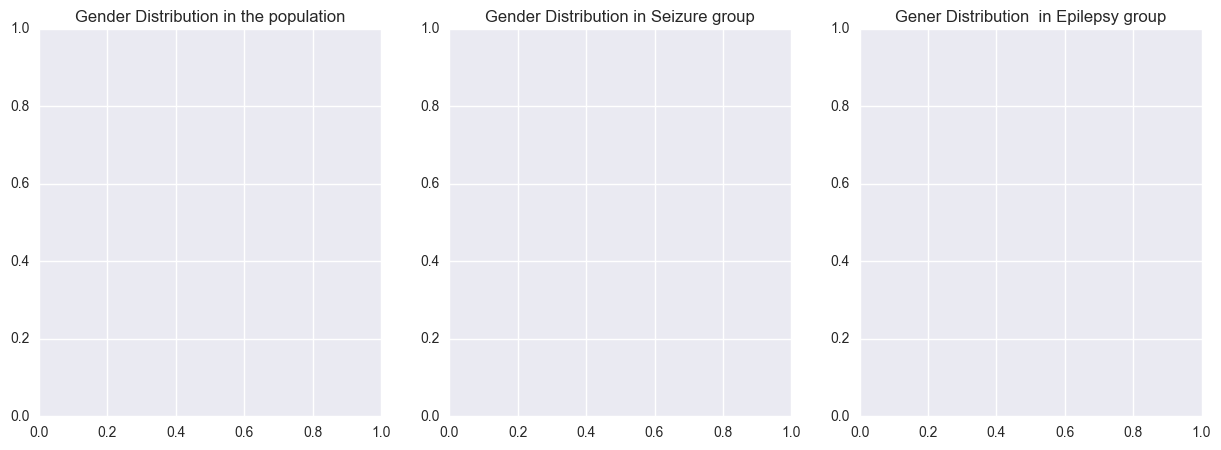

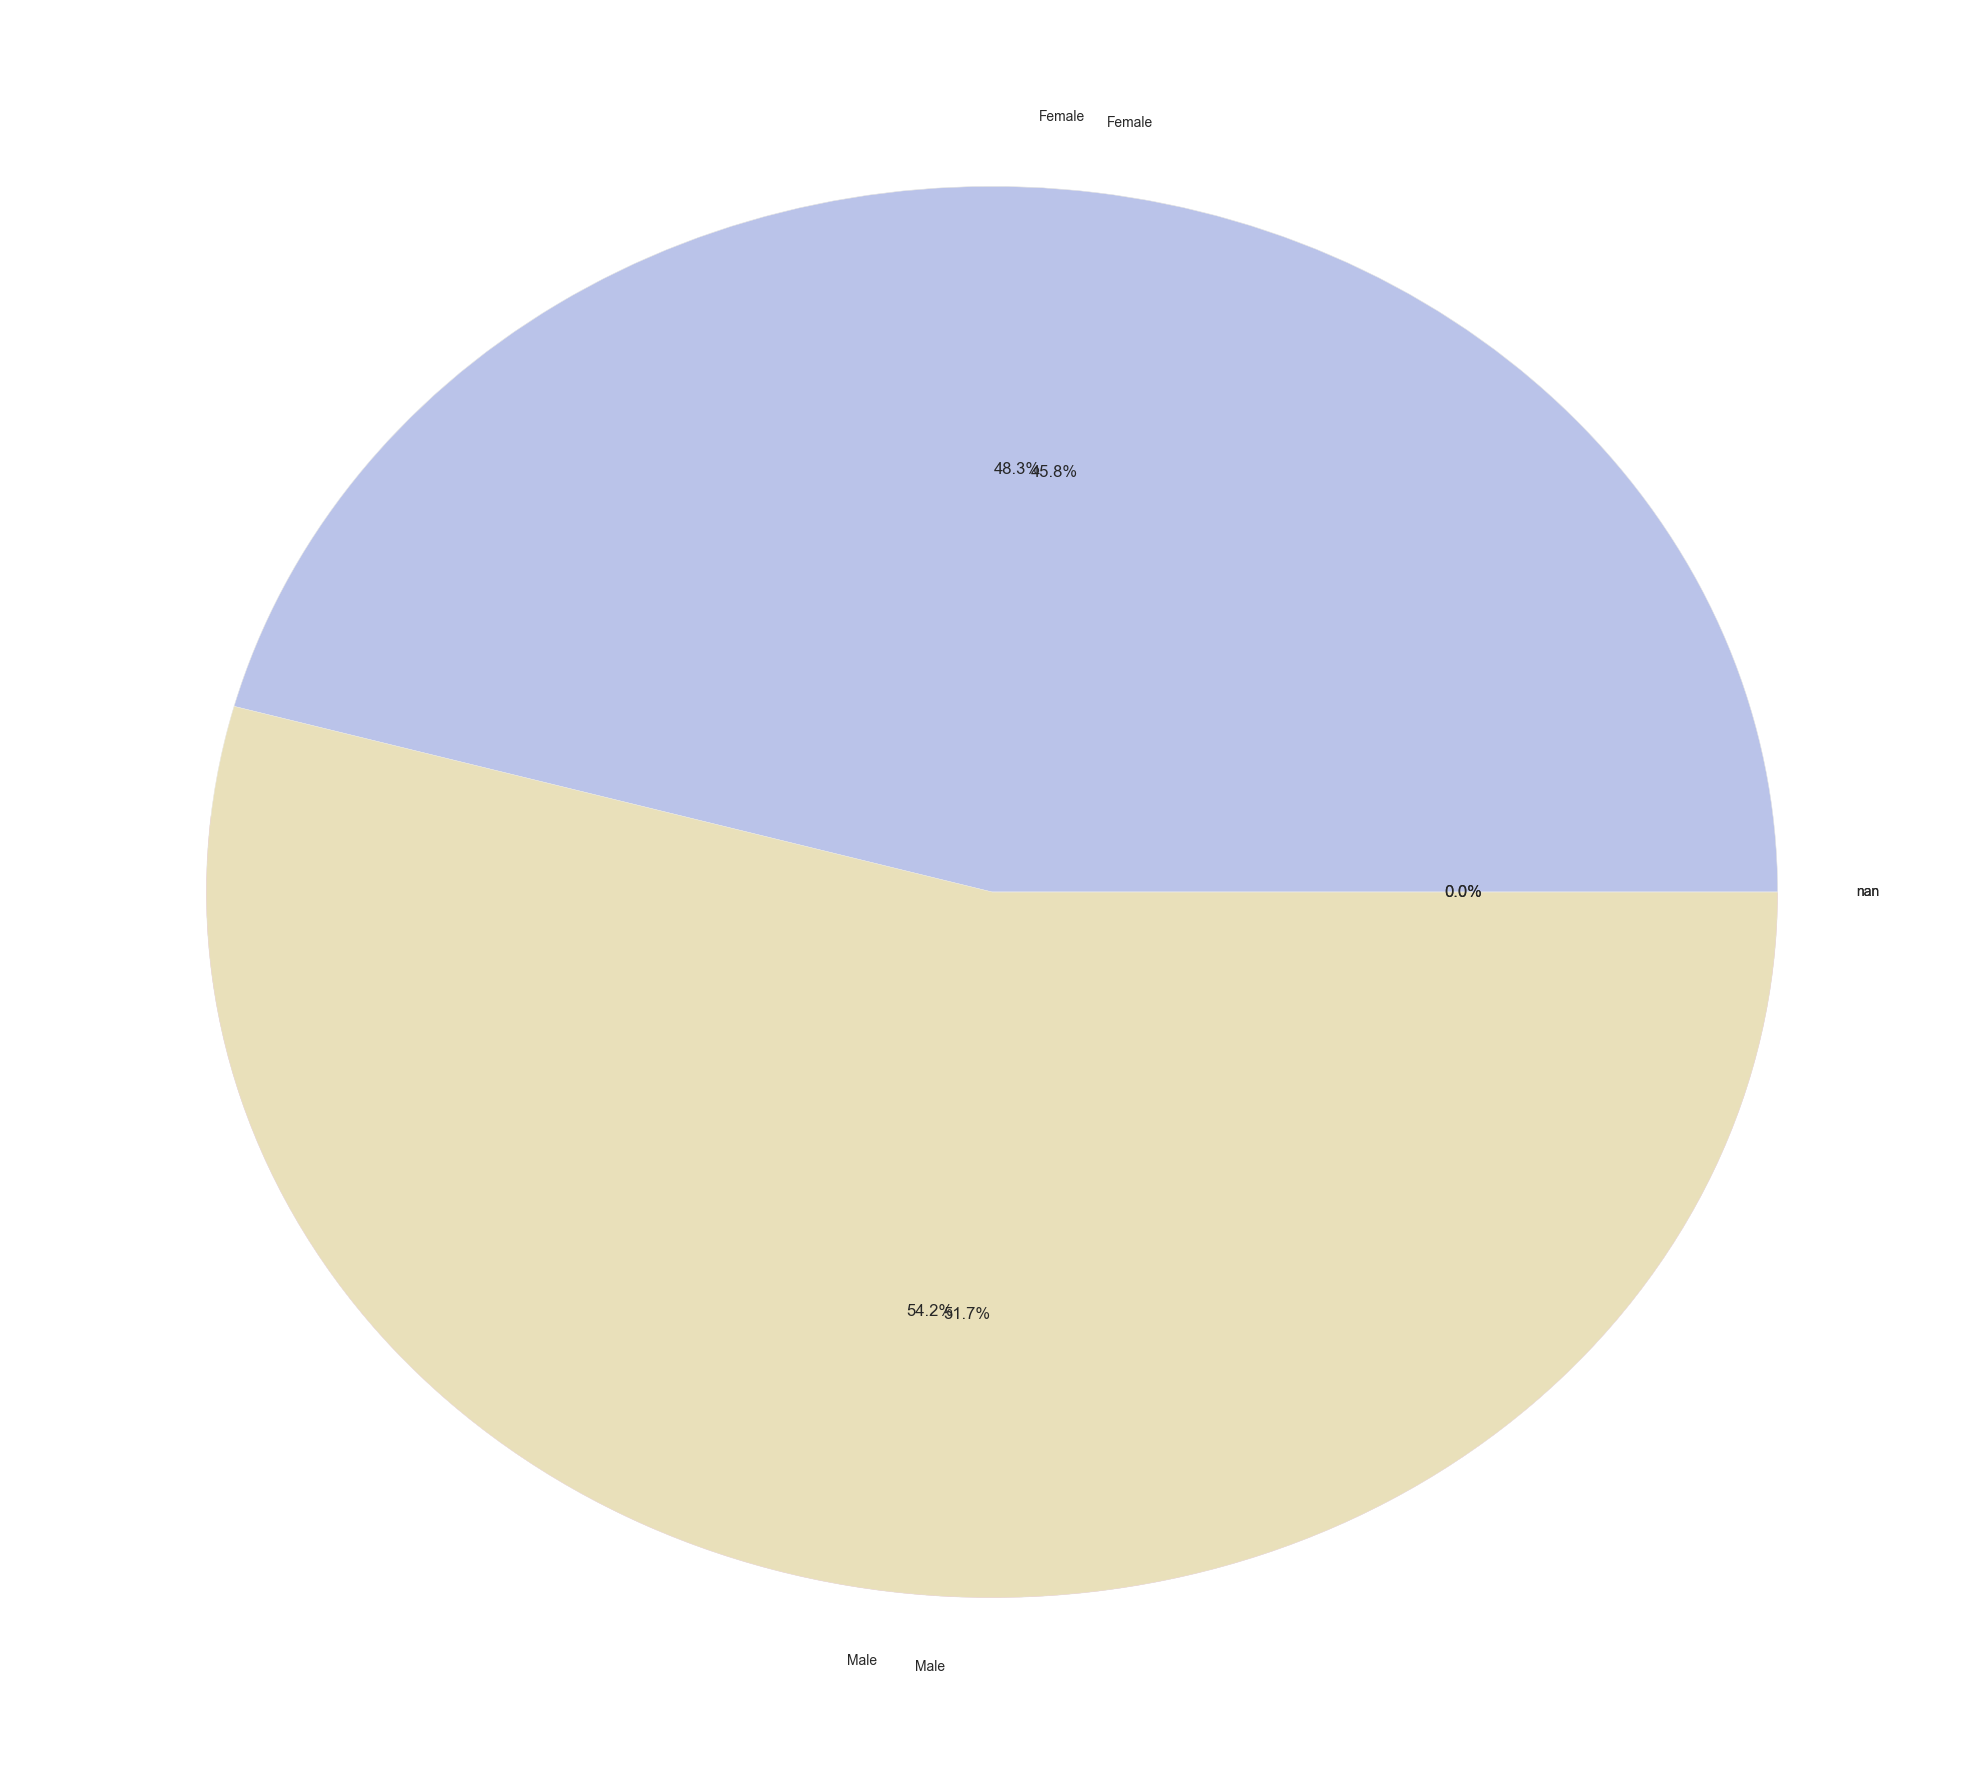

In [92]:
# Plot data
fig, ax = plt.subplots(1,3, figsize = (15, 5))

plot_columns = ['Gender']
fig = plt.figure(figsize=(20, 18))

#ax[0] = fig.add_subplot(2, 2, 1)
ax[0].set_title('Gender Distribution in the population')
ax[0] = [pie_plot(data_main, 'Gender',ax,)] #bvc b 

ax[1].set_title('Gender Distribution in Seizure group')

#ax[1] = fig.add_subplot(2, 2, 2)
ax[2].set_title('Gener Distribution  in Epilepsy group')
ax[2] = [pie_plot(data_main, 'Gender', ax,'Epilepsy_identification', 'Epilepsy')]

plt.tight_layout()

plt.show()

In [73]:


ax1 = fig.add_subplot(2, 2, 3)
ax1.set_title('distribution of ethinc group in population')
ax1 = [pie_plot(data_main, 'Ethinic_gp',) for x in plot_columns]


ax1 = fig.add_subplot(2, 2, 4)
ax1.set_title('distribution of ethinc group in Epilepsy group')
ax1 = [pie_plot(data_main, 'Ethinic_gp', 'Epilepsy_identification', 'Epilepsy') for x in plot_columns]


plt.tight_layout()
plt.axis('equal')
plt.show();

SyntaxError: invalid syntax (<ipython-input-73-dcc89a79b612>, line 6)

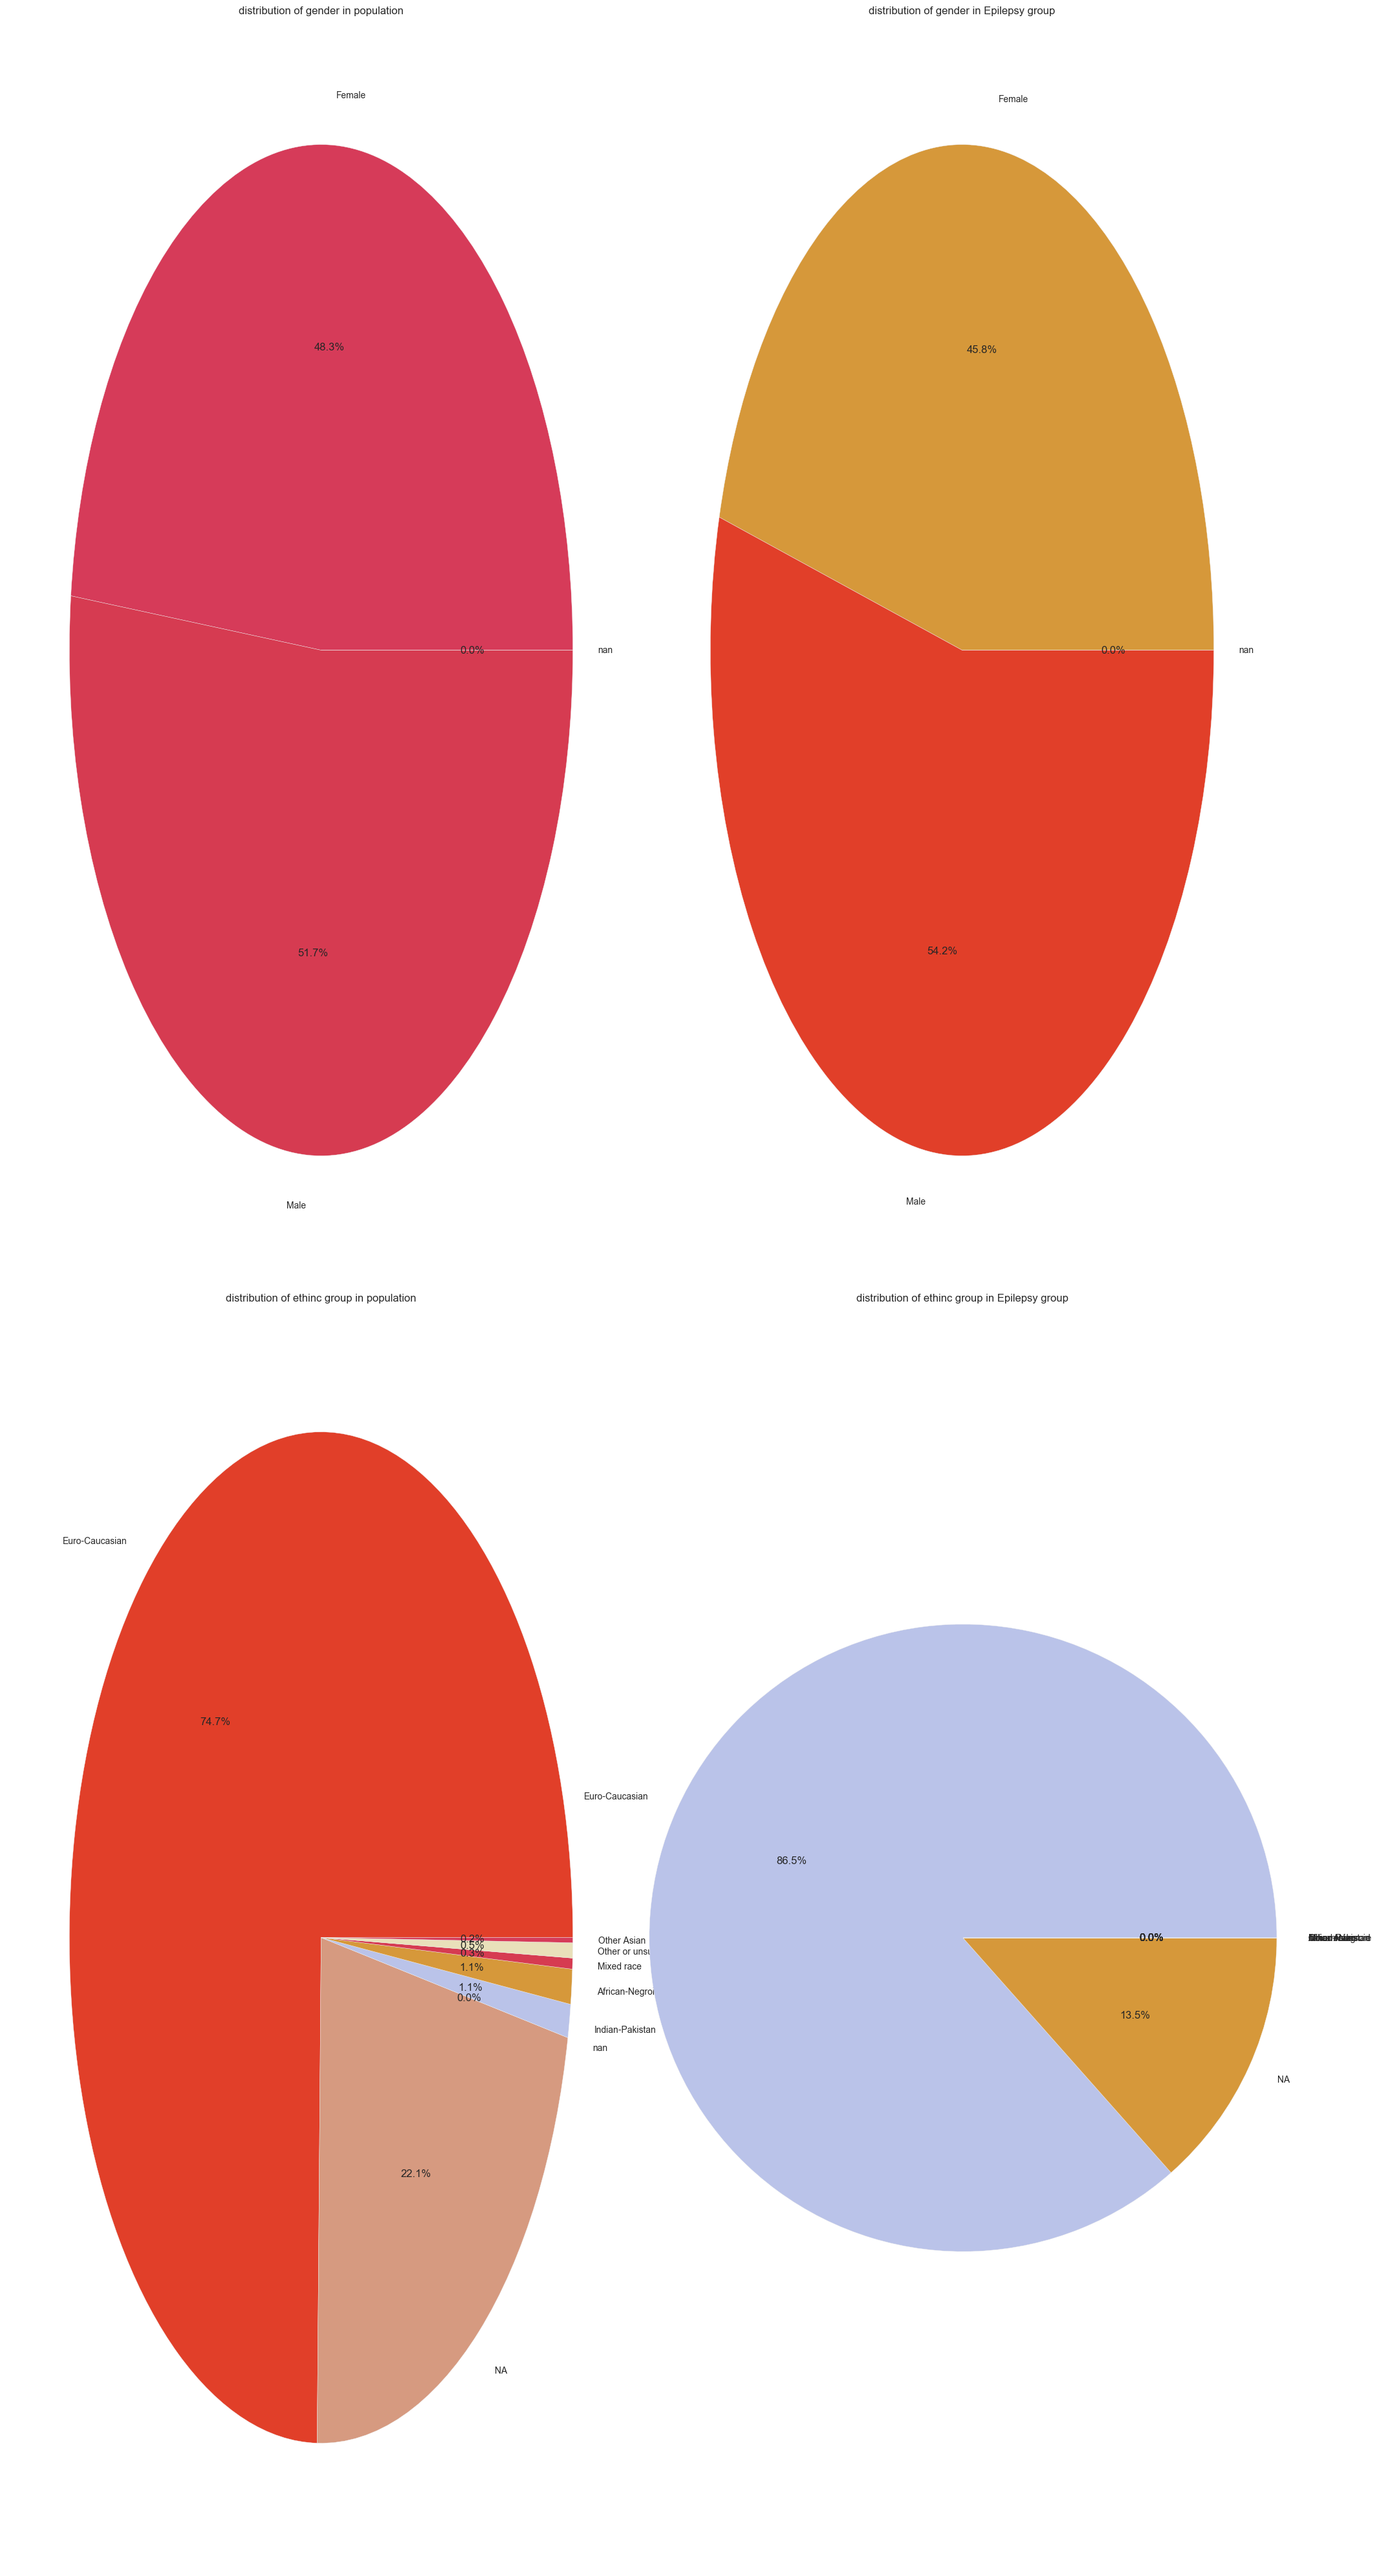

In [75]:
plot_columns = ['Gender']
fig = plt.figure(figsize=(20, 40))


ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('distribution of gender in population')
ax1 = [pie_plot(data_main, 'Gender',)]



ax1 = fig.add_subplot(2, 2, 2)
ax1.set_title('distribution of gender in Epilepsy group')
ax1 = [pie_plot(data_main, 'Gender', 'Epilepsy_identification', 'Epilepsy')]

ax1 = fig.add_subplot(2, 2, 3)
ax1.set_title('distribution of ethinc group in population')
ax1 = [pie_plot(data_main, 'Ethinic_gp',) for x in plot_columns]


ax1 = fig.add_subplot(2, 2, 4)
ax1.set_title('distribution of ethinc group in Epilepsy group')
ax1 = [pie_plot(data_main, 'Ethinic_gp', 'Epilepsy_identification', 'Epilepsy') for x in plot_columns]


plt.tight_layout()
plt.axis('equal')
plt.show();

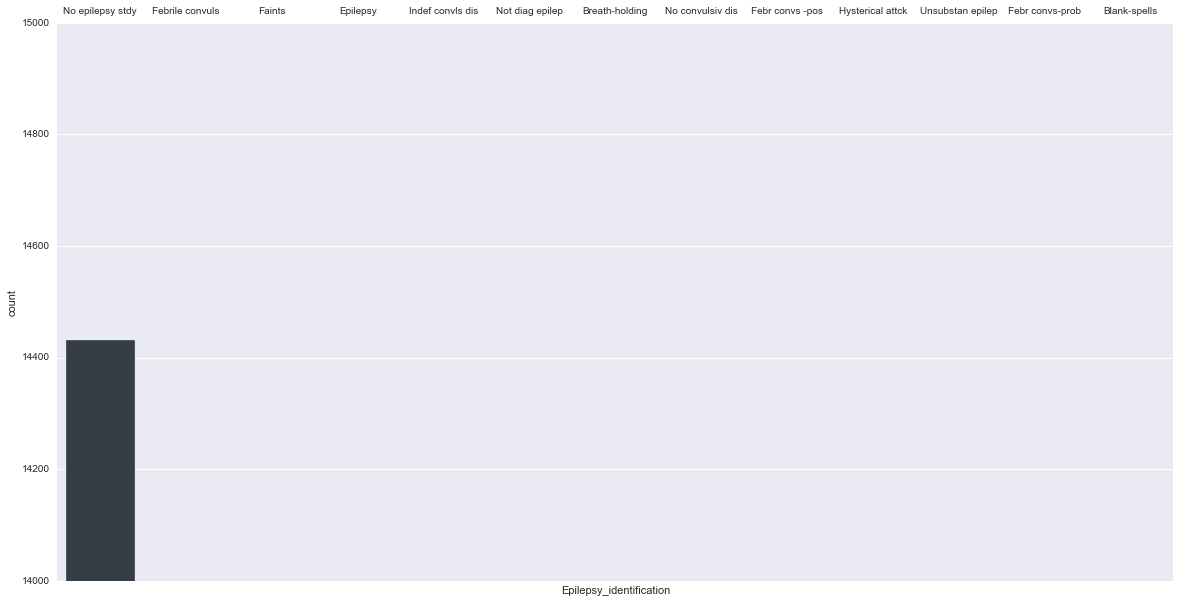

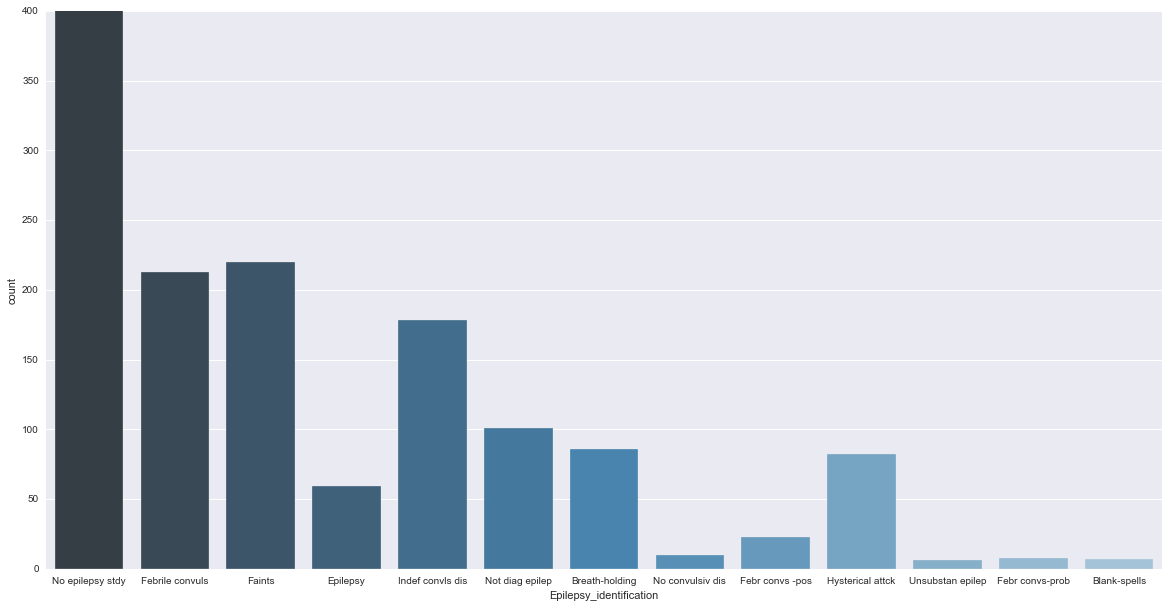

In [96]:
#plot_data = np.isfinite(data_main['2P Age at 1st epilepsy attack'])
#yvals = [100,500,2000,15000]
#fig = plt.figure(figsize=(20, 10))

#f, (ax2, ax3) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
#ax2 = data_main['Epilepsy_identification'].value_counts().plot(kind='bar',)
fig = plt.figure(figsize=(20, 10))
ax2 = sns.countplot(x="Epilepsy_identification", data=data_main, palette="Blues_d");
fig = plt.figure(figsize=(20, 10))
ax3 = sns.countplot(x="Epilepsy_identification", data=data_main, palette="Blues_d");

# zoom-in / limit the view to different portions of the data
ax2.set_ylim(14000., 15000.)  # outliers only
ax3.set_ylim(0, 400.)  # most of the data

# hide the spines between ax and ax2
ax3.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.tick_top()

ax3.xaxis.tick_bottom()


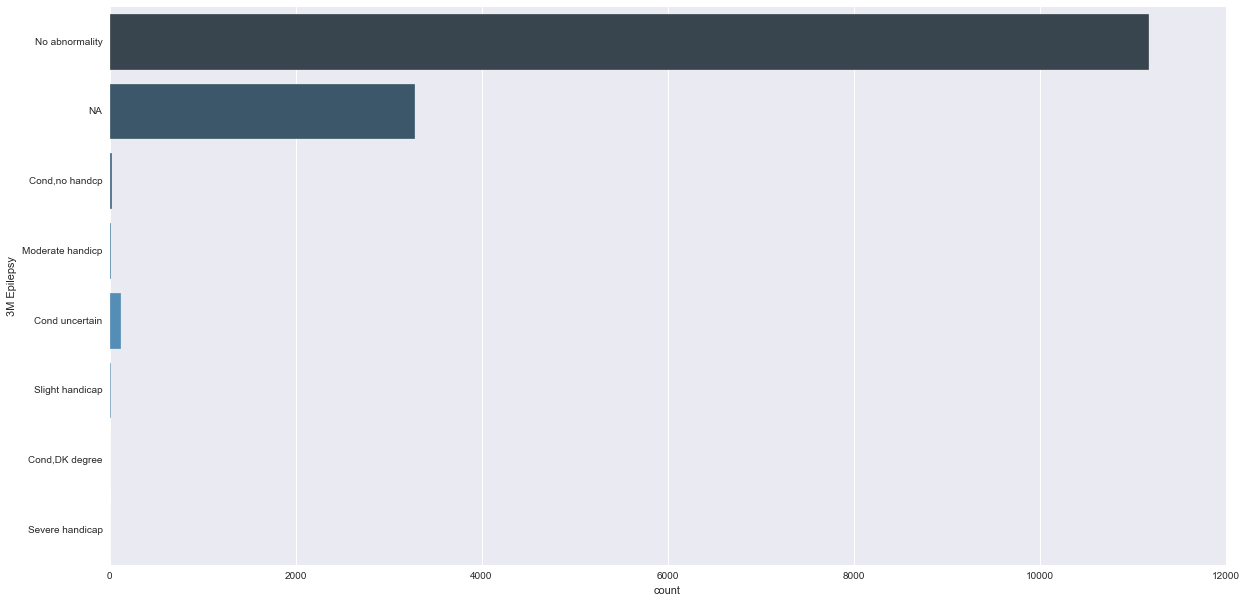

In [97]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(y="3M Epilepsy", data=data_main, palette="Blues_d");

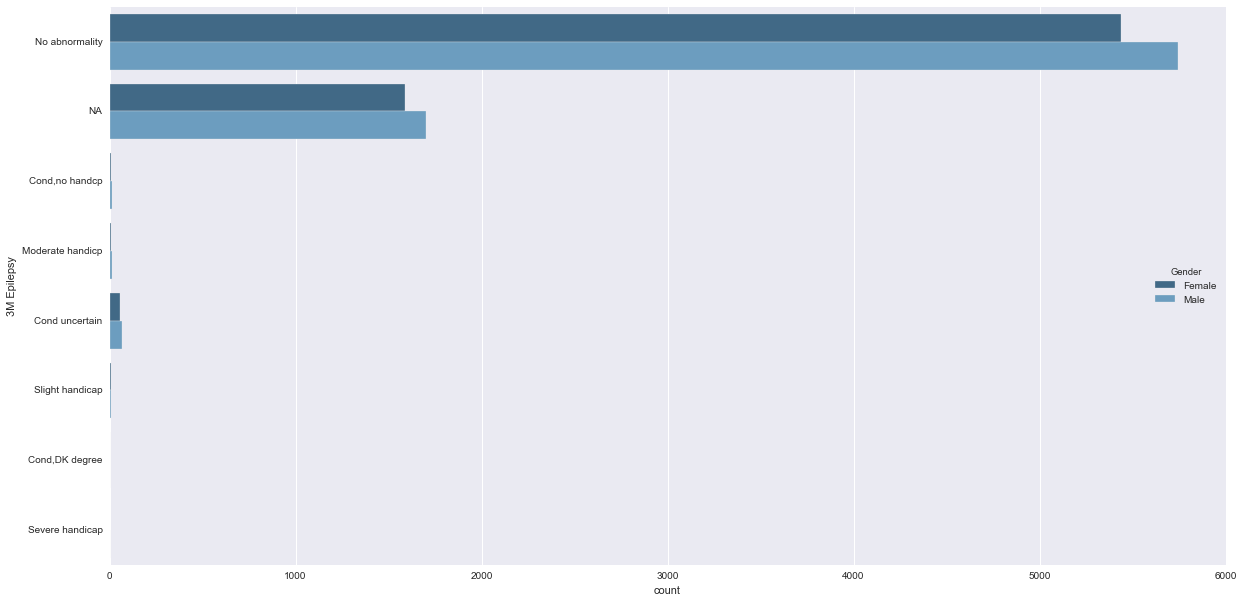

In [98]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(y="3M Epilepsy", hue="Gender", data=data_main, palette="Blues_d");

### Chi-Squared Test of Independence

The chi-squared test of independence tests whether two categorical variables are independent. 

In [100]:
recent_attack = data_main['2P Age at most recent epilepsy attack']
age_first_attack = data_main['2P Age at 1st epilepsy attack']

In [101]:
recent_attack_table = pd.crosstab(index=recent_attack, columns="count")
age_first_attack_table = pd.crosstab(index=age_first_attack, columns="count")

In [102]:
Cross_table = pd.crosstab(recent_attack, age_first_attack, margins = True)
observed = Cross_table.ix[0:13,0:12]   # Get table without totals for later use

In [103]:
age_first_attack.value_counts()

No epilepsy stdy    14633
1                     106
2                      82
10                     75
9                      46
11                     45
3                      43
7                      31
5                      30
8                      29
4                      27
6                      26
Name: 2P Age at 1st epilepsy attack, dtype: int64

In [104]:
recent_attack.value_counts()

No epilepsy stdy    14626
11                    117
10                    112
2                      77
1                      74
3                      57
9                      55
4                      46
5                      36
7                      26
8                      25
6                      22
12                      1
Name: 2P Age at most recent epilepsy attack, dtype: int64

In [105]:
Cross_table

2P Age at 1st epilepsy attack,1,10,11,2,3,4,5,6,7,8,9,No epilepsy stdy,All
2P Age at most recent epilepsy attack,,,,,,,,,,,,,
1,53,0,0,0,0,0,0,0,0,0,0,1,54
10,1,55,0,2,4,4,6,7,6,6,11,4,106
11,1,20,45,5,4,3,3,4,6,9,9,5,114
12,0,0,0,0,0,0,0,0,0,0,0,1,1
2,14,0,0,48,0,0,0,0,0,0,0,2,64
3,12,0,0,5,25,0,0,0,0,0,0,7,49
4,6,0,0,11,3,16,0,0,0,0,0,4,40
5,6,0,0,3,1,2,14,0,0,0,0,2,28
6,4,0,0,1,1,0,3,9,0,0,0,0,18


chi-squared test statistic : 58494.964159487434

P values : 0.00

DF : 132 

As expected, given the low p-value, the test result detect a significant relationship between the variables: '2P Age at most recent epilepsy attack' and '2P Age at 1st epilepsy attack'

In [ ]:
#data_main_mapped.head()

In [ ]:
#data_main_mapped.n553.dtypes

## Epilepsys vs seizures

### Features selection 

In [281]:
epilepsy_response.head()

,epilepsy7,epilepsy11,epilepsy16,seizure7,seizure11,seizure16,seizure,epilepsy
0,no,no,no,0,0,0,0,0
1,no,-1,no,0,0,0,0,0
2,no,no,no,0,0,0,0,0
3,no,no,no,0,0,0,0,0
4,no,no,no,0,0,0,0,0


In [282]:
# the response variables columns
#response_columns = ['y_epilepsy', 'y_convulsions_epilepsy', 'y_convulsions']
# predictors
#feature_columns = [ x for x in data_main_clean_2.columns if not any(m == x for m in response_columns)]
X_train = data_main_mapped.copy()
# the response variables
y_1 = epilepsy_response['seizure']
#y_2 = epilepsy_response['epilepsy']
y_2 = [0 if x==0 else 1 if (x==1 and y==1) else 2 if (x==1 and y==0) else 9 for\
                                             x, y in zip(epilepsy_response.seizure,epilepsy_response.epilepsy)]

# Stage 4: Model the Data

In [283]:
print Counter(y_1)
print Counter(y_2)

Counter({0: 17143, 1: 1415})
Counter({0: 17143, 2: 1063, 1: 352})


In [284]:
numeric_columns = [x for x,y in zip(X_train.columns, X_train.dtypes) if any([ y == m for m in ['int64', 'float64']]) ]
cat_columns = [x for x,y in zip(X_train.columns, X_train.dtypes) if not any([ y == m for m in ['int64', 'float64']]) ]

In [285]:
data_main_mapped.shape, len(cat_columns), len(numeric_columns)

((18558, 1707), 1461, 246)

In [286]:
cat_columns[10]

'0 mums paid job when starting this baby (gro 1951)'

In [287]:
#mask = X_train.apply(lambda x : 'Categorical' if len(x.unique()) < 15 else 'Numeric')
#mask.shape
# cat_columns = mask[(mask == 'Categorical')].index.values
# cat_columns
# len(cat_columns)

In [288]:
#X_train.head()

In [289]:
# Encoding the categorical variables 
X_train_2 = encode_onehot(X_train, cat_columns)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: the 'outtype' keyword is deprecated, use 'orient' instead


In [290]:
X_train_2.shape

(18558, 30275)

In [291]:
#X_train_2.head()

In [292]:
X_train_2 = X_train_2.fillna(0)

In [293]:
X_train_2 = clean_column_names(X_train_2)

In [294]:
X_train_2.shape, y_1.shape

((18558, 30275), (18558,))

In [72]:
#list(y_1.values)

In [295]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=7)

forest.fit(X_train_2.values, list(y_1.values))
#importances = forest.feature_importances_

feature_importances = zip(X_train_2.columns, forest.feature_importances_)

sorted_feature = sorted(feature_importances, key= lambda x: x[1], reverse=True)
#print sorted_feature[:20]

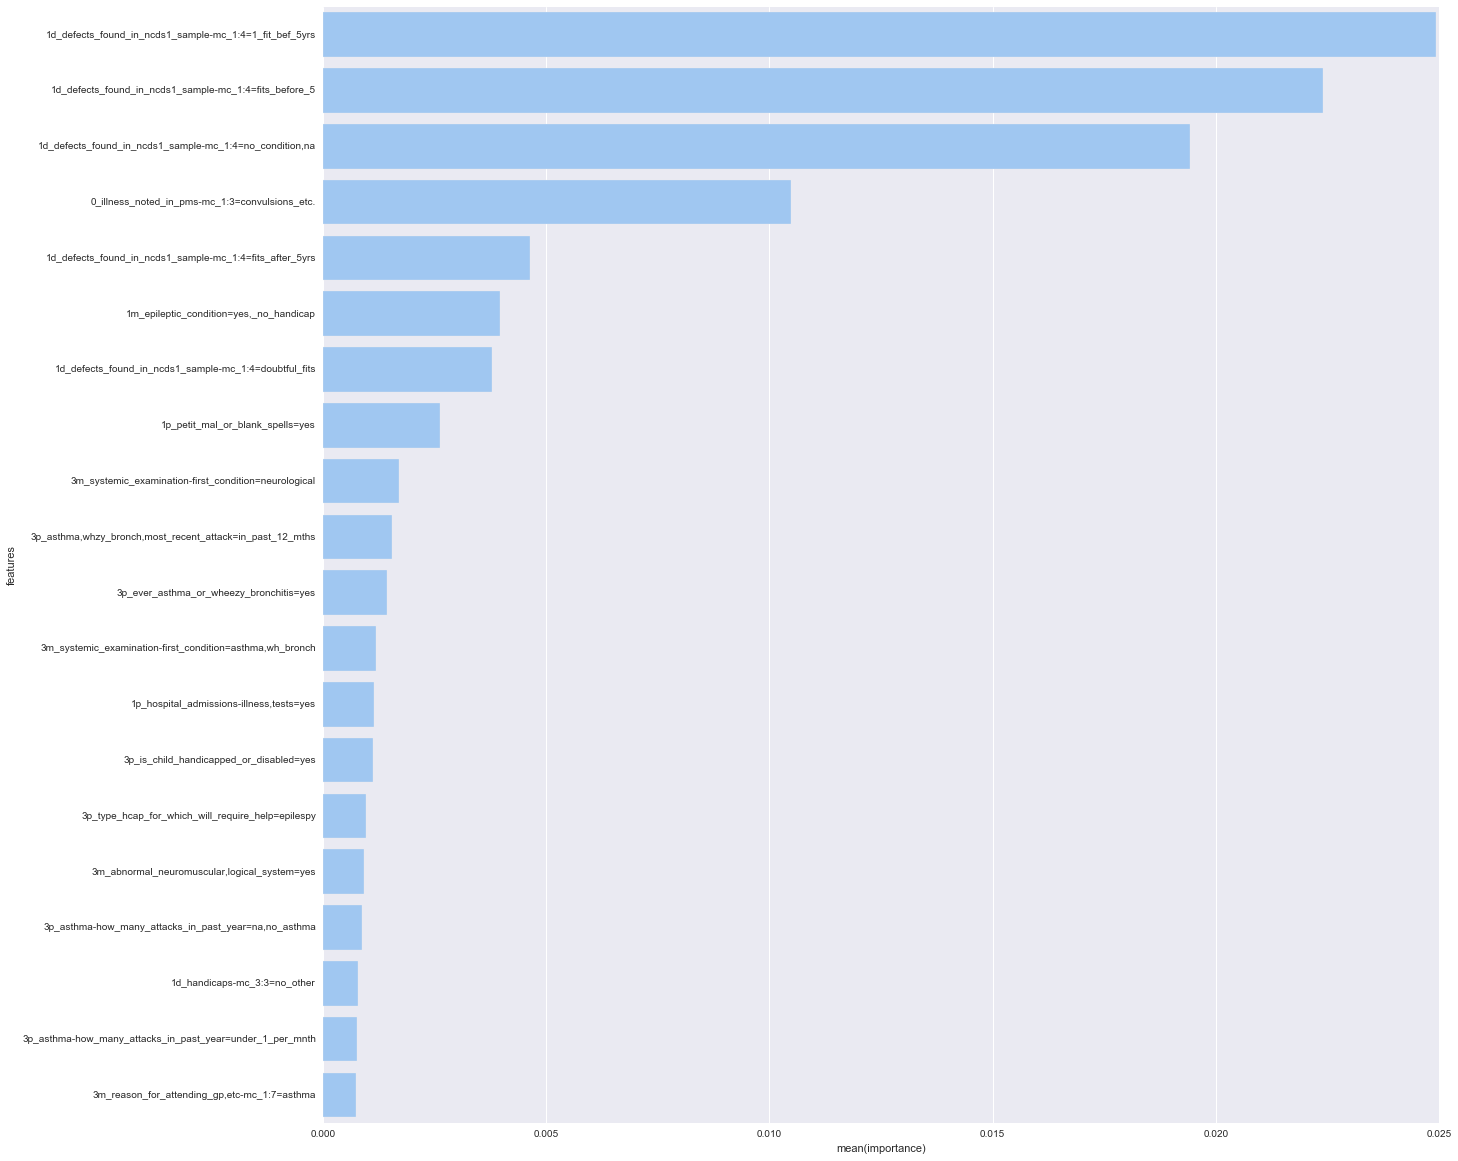

In [296]:
fig = plt.figure(figsize=(20, 20))
sns.set_color_codes("pastel")
sns.barplot(y="features", x="importance", data=pd.DataFrame({'features':[x for x,y in sorted_feature[:20]], 
                                                            'importance': [y for x,y in sorted_feature[:20]]}),
            label="Total", color="b");

In [297]:

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=7)

forest.fit(X_train_2.values, y_2)
#importances = forest.feature_importances_

feature_importances = zip(X_train_2.columns, forest.feature_importances_)

sorted_feature = sorted(feature_importances, key= lambda x: x[1], reverse=True)
#print sorted_feature[:20]

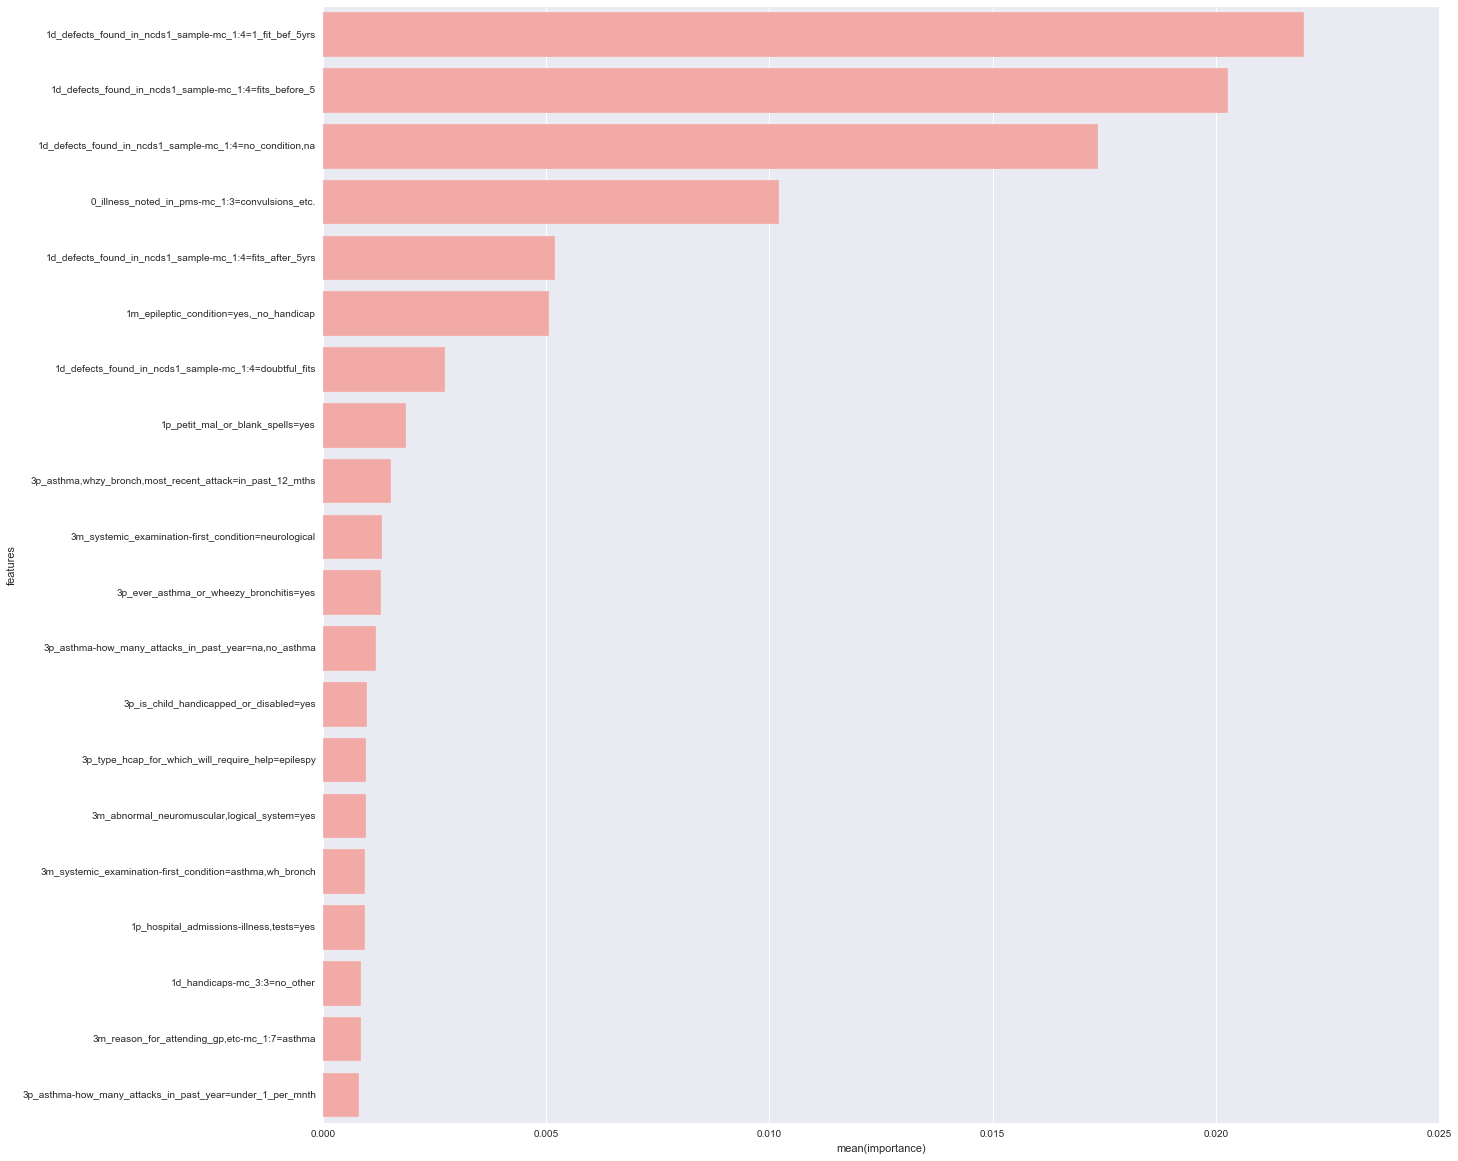

In [298]:
fig = plt.figure(figsize=(20, 20))
sns.set_color_codes("pastel")
sns.barplot(y="features", x="importance", data=pd.DataFrame({'features':[x for x,y in sorted_feature[:20]], 
                                                            'importance': [y for x,y in sorted_feature[:20]]}),
            label="Total", color="r");

### Baseline model

Automatically created module for IPython interactive environment


#### Logistic Regression

# Stage 5: Communicate the Data

In [302]:
test_size = 0.33
X_train_3, X_test_3, y_train_3, y_test_3 = cross_validation.train_test_split(X_train_2\
                                                                             [[x for x,y in sorted_feature[:20]]],
                                                                             list(y_1.values))

In [303]:
model = LogisticRegression(class_weight='balanced',)
model.fit(X_train_3, y_train_3)
y_pred = model.predict(X_test_3)
target_names = ['No Convulsions', 'Convulsions']
print(classification_report(y_test_3, y_pred, target_names=target_names))
print 'F1 Score is:', metrics.f1_score(y_test_3, y_pred, pos_label=1)
print "Cohen's Kappa Score is:", metrics.cohen_kappa_score(y_test_3, y_pred,)

                precision    recall  f1-score   support

No Convulsions       0.97      0.94      0.96      4288
   Convulsions       0.47      0.63      0.54       352

   avg / total       0.93      0.92      0.92      4640

F1 Score is: 0.540606060606
Cohen's Kappa Score is: 0.496836630989


In [305]:
test_size = 0.33
X_train_4, X_test_4, y_train_4, y_test_4 = cross_validation.train_test_split(X_train_2\
                                                                             [[x for x,y in sorted_feature[:20]]],
                                                                             list(y_2))

In [307]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_4, y_train_4)
y_pred = model.predict(X_test_4)
target_names = ['No Convulsions','Convulsions', 'Convulsions_and_Epilepsy']
print(classification_report(y_test_4, y_pred, target_names=target_names))
print 'Accuracy Score on test is:', metrics.accuracy_score(y_test_4, y_pred,)
print "Cohen's Kappa Score is:", metrics.cohen_kappa_score(y_test_4, y_pred,)

                          precision    recall  f1-score   support

          No Convulsions       0.97      0.98      0.97      4274
             Convulsions       0.48      0.57      0.52        90
Convulsions_and_Epilepsy       0.53      0.37      0.43       276

             avg / total       0.93      0.94      0.93      4640

Accuracy Score on test is: 0.936206896552
Cohen's Kappa Score is: 0.527923667061


The accuracy is high because we are overfitting.

#### LDA

In [309]:
model = LinearDiscriminantAnalysis()
model.fit(X_train_3, y_train_3)
y_pred = model.predict(X_test_3)
target_names = ['No Convulsions', 'Convulsions']
print(classification_report(y_test_3, y_pred, target_names=target_names))
print 'F1 Score is:', metrics.f1_score(y_test_3, y_pred, pos_label=1)
print "Cohen's Kappa Score is:", metrics.cohen_kappa_score(y_test_3, y_pred,)

                precision    recall  f1-score   support

No Convulsions       0.96      1.00      0.98      4288
   Convulsions       0.90      0.52      0.66       352

   avg / total       0.96      0.96      0.95      4640

F1 Score is: 0.657039711191
Cohen's Kappa Score is: 0.63695543315


In [310]:
model = LinearDiscriminantAnalysis()
model.fit(X_train_4, y_train_4)
y_pred = model.predict(X_test_4)
target_names = ['No Convulsions','Convulsions', 'Convulsions_and_Epilepsy']
print(classification_report(y_test_4, y_pred, target_names=target_names))
print 'Accuracy Score on test is:', metrics.accuracy_score(y_test_4, y_pred,)
print "Cohen's Kappa Score is:", metrics.cohen_kappa_score(y_test_4, y_pred,)

                          precision    recall  f1-score   support

          No Convulsions       0.96      0.99      0.98      4274
             Convulsions       0.54      0.61      0.58        90
Convulsions_and_Epilepsy       0.69      0.33      0.44       276

             avg / total       0.94      0.95      0.94      4640

Accuracy Score on test is: 0.946767241379
Cohen's Kappa Score is: 0.565971512147


#### Handling the imbalanced classes

In [95]:
#SMOTE: Synthetic Minority Over-sampling Technique
# Apply SMOTE + ENN
sm = SMOTEENN(0.1)
X_resampled, y_resampled = sm.fit_sample(X_train_2.values, list(y_2.values))

#### Handling the missing values

### Appendices

#### Dealing with missing values

In [ ]:
#missing_df = pd.read_csv('./dataset/dataset_1_missing.txt')
#full_df = pd.read_csv('./dataset/dataset_1_full.txt')

#no_y_ind = missing_df[missing_df['y'].isnull()].index
#with_y_ind = missing_df[missing_df['y'].notnull()].index

#number of neighbours
#k=3

#predicted_knn, r_knn = fill_knn(missing_df, full_df, no_y_ind, with_y_ind, k)
#print 'R^2 value of KNN fit, for k=', k, ': ', r_knn

#### PCA, Resampling and Visuation

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


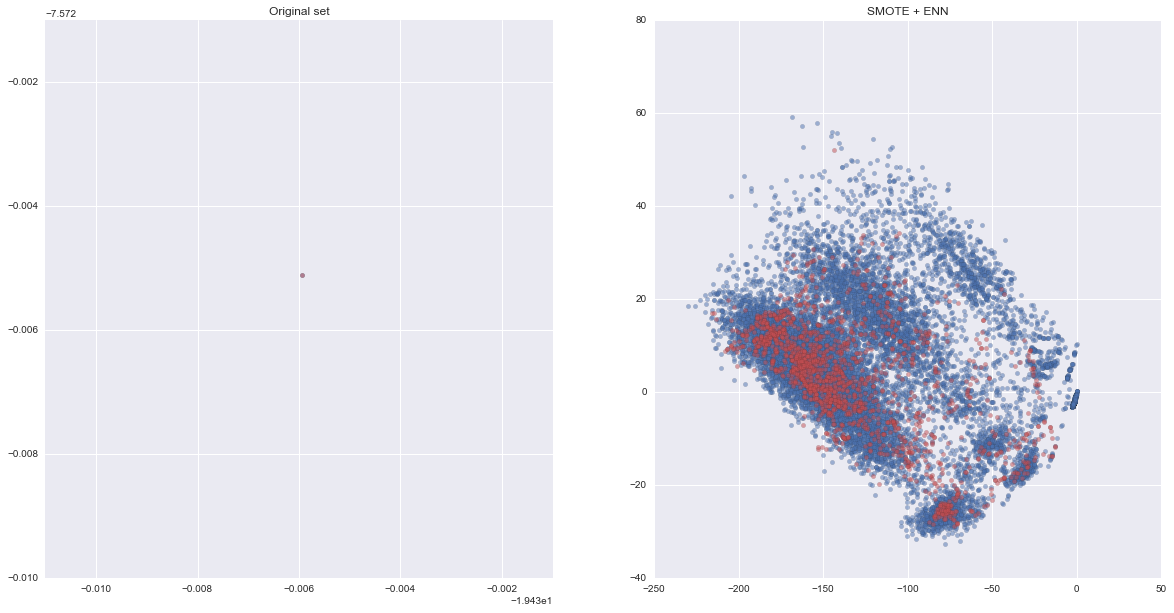

In [94]:
X_train_2_pre = preprocessing.scale(X_train_2)

# Define some color for the plotting
almost_black = '#262626'
palette = sns.color_palette()

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=3)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train_2_pre)

# Apply SMOTE + ENN
sm = SMOTEENN(0.1)
X_resampled, y_resampled = sm.fit_sample(X_train_2.values, list(y_2.values))
X_res_vis = pca.transform(X_resampled)

#fig = plt.figure(figsize=(15, 5))
# Two subplots, unpack the axes array immediately
#f, (ax1, ax2) = plt.subplots(1, 2, projection='3d')
fig, ((ax1, ax2)) =  plt.subplots(1, 2, figsize=(20, 10))
ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
ax1.set_title('Original set')


ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5, edgecolor=almost_black,
            facecolor=palette[0], linewidth=0.15)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5, edgecolor=almost_black,
            facecolor=palette[2], linewidth=0.15)
ax2.set_title('SMOTE + ENN')

plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


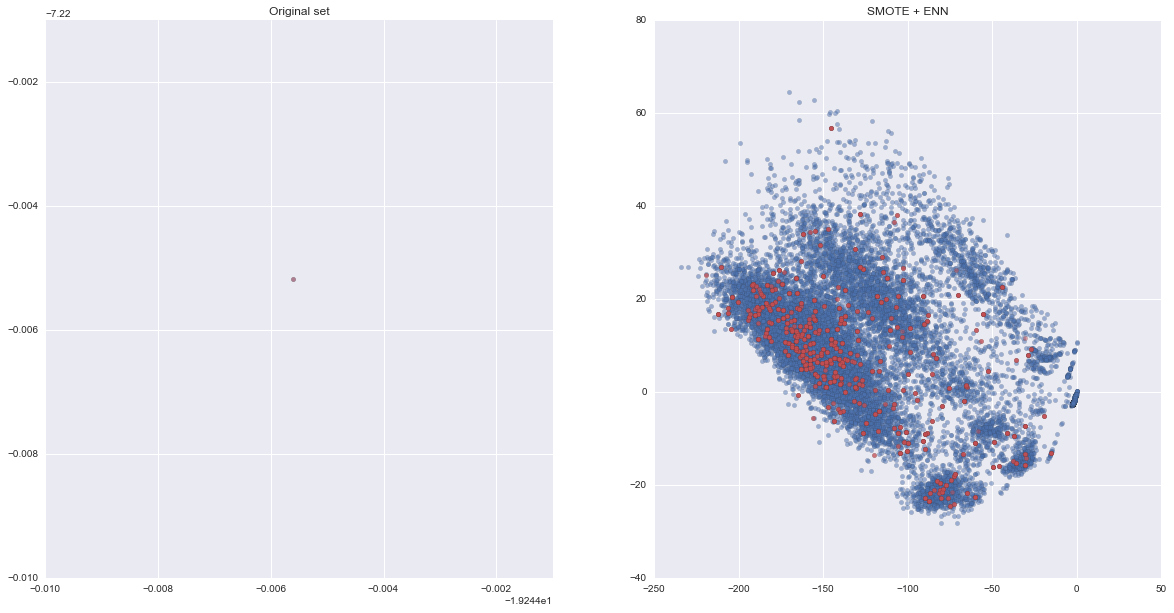

In [312]:
X_train_2_pre = preprocessing.scale(X_train_2)

# Define some color for the plotting
almost_black = '#262626'
palette = sns.color_palette()

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=3)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train_2_pre)

# Apply Over Sampling
sm = RandomOverSampler(0.1)
X_resampled, y_resampled = sm.fit_sample(X_train_2.values, list(y_2))
X_res_vis = pca.transform(X_resampled)

#fig = plt.figure(figsize=(15, 5))
# Two subplots, unpack the axes array immediately
#f, (ax1, ax2) = plt.subplots(1, 2, projection='3d')
fig, ((ax1, ax2)) =  plt.subplots(1, 2, figsize=(20, 10))
ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
ax1.set_title('Original set')


ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5, edgecolor=almost_black,
            facecolor=palette[0], linewidth=0.15)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5, edgecolor=almost_black,
            facecolor=palette[2], linewidth=0.15)
ax2.set_title('SMOTE + ENN')

plt.show()

Pos. = 353	Variable = n1842	Variable label = 12D Epilepsy identification
This variable is  numeric, the SPSS measurement level is ORDINAL
SPSS user missing values = -1.0 thru -2.0
	Value label information for n1842
	Value = 1.0	Label = No convulsiv dis
	Value = 2.0	Label = Indef convls dis
	Value = 3.0	Label = Faints
	Value = 4.0	Label = Hysterical attck
	Value = 5.0	Label = Epilepsy
	Value = 6.0	Label = Unsubstan epilep
	Value = 7.0	Label = Febr convs-prob
	Value = 8.0	Label = Febr convs -pos
	Value = 9.0	Label = Not diag epilep
	Value = 10.0	Label = Febrile convuls
	Value = 11.0	Label = Breath-holding
	Value = 12.0	Label = Blank-spells
	Value = -1.0	Label = Nt epilepsy stdy
	Value = -2.0	Label = No NCDS1,NCDS2

In [ ]:
Counter(data_main["Epilepsy_identification"])